## Imports

In [4]:
import os
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

def split_df_to_latex(df, cols_per_table=10, float_fmt="%.3f", caption_prefix="Part", label_prefix="tab:data_example"):
    latex_tables = []
    n_cols = df.shape[1]
    n_parts = (n_cols + cols_per_table - 1) // cols_per_table  # ceil division

    for i in range(n_parts):
        start_col = i * cols_per_table
        end_col = min((i + 1) * cols_per_table, n_cols)
        df_part = df.iloc[:, start_col:end_col]
        
        # Generate LaTeX for this part
        latex_code = (
            "\\begin{table}[ht]\n"
            "\\centering\n"
            "\\resizebox{\\textwidth}{!}{%\n"
            + df_part.to_latex(index=True, float_format=float_fmt, escape=False, longtable=False,
                               caption=f"Original data example ({caption_prefix} {i+1})",
                               label=f"{label_prefix}_{i+1}",
                               bold_rows=True)
            + "}\n"
            "\\end{table}\n"
        )
        latex_tables.append(latex_code)
    
    return latex_tables


df = pd.read_csv("data_files/Train_details/B Balchik 2020 11 14 FPOD_6288 file0 PART 79d 23h 19m train details", sep='\t')
data = df.head(5)
latex_part1 = latex_parts = split_df_to_latex(data, cols_per_table=10)

for part in latex_parts:
    print(part)
    print("\n\n")


\begin{table}[ht]
\centering
\resizebox{\textwidth}{!}{%
\begin{table}
\caption{Original data example (Part 1)}
\label{tab:data_example_1}
\begin{tabular}{lrlrrrrrllr}
\toprule
 & Line & File & Minute & Time & OpThreshold & ClksThisMin & TrnID & SpClass & Qn & ICIgood \\
\midrule
\textbf{0} & 1 & B Balchik 2 & 63575465 & 29060110 & 0 & 321 & 1 & NBHF & H & 1 \\
\textbf{1} & 2 & B Balchik 2 & 63575465 & 34502465 & 0 & 321 & 2 & NBHF & H & 1 \\
\textbf{2} & 3 & B Balchik 2 & 63575465 & 59174050 & 0 & 321 & 4 & NBHF & M & 1 \\
\textbf{3} & 4 & B Balchik 2 & 63575466 & 12531720 & 0 & 289 & 1 & NBHF & M & 1 \\
\textbf{4} & 5 & B Balchik 2 & 63575466 & 20121500 & 0 & 289 & 2 & NBHF & M & 1 \\
\bottomrule
\end{tabular}
\end{table}
}
\end{table}




\begin{table}[ht]
\centering
\resizebox{\textwidth}{!}{%
\begin{table}
\caption{Original data example (Part 2)}
\label{tab:data_example_2}
\begin{tabular}{lrrrrrrrrlr}
\toprule
 & NofClx & medianKHz & avSPL & avPkAt & avNcyc & AvPRF & avEndF & tWUT

In [6]:
# class AcousticSequenceDataset(Dataset):
#     def __init__(self, data_dir, excel_path=None, target_length=128, click_filter=None,
#                  id_columns=('File', 'Minute', 'Time')):
#         self.data_dir = data_dir
#         self.target_length = target_length
#         self.click_filter = click_filter
#         self.id_columns = id_columns
#         self.label_encoder = LabelEncoder()
# 
#         self.labeled_timeseries = []
#         self.identities = []
#         self.labels_for_labeled_data = []
# 
#         self.labeled_data = pd.DataFrame()
#         self.labels = []
#         self.labeled_indices = set()
#         self.identity_to_label = {}
# 
#         if excel_path:
#             self._load_labeled_data(excel_path)
# 
#         self.unlabeled_sequences, self.unlabeled_metadata = self._load_and_process_files()
# 
#     def _load_labeled_data(self, excel_path):
#         xl = pd.ExcelFile(excel_path)
#         dfs = []
#         for sheet in xl.sheet_names:
#             df = xl.parse(sheet)
#             df['label'] = sheet
#             dfs.append(df)
#         full_labeled = pd.concat(dfs, ignore_index=True)
# 
#         full_labeled[self.id_columns[0]] = full_labeled[self.id_columns[0]].astype(str)
#         full_labeled[self.id_columns[1]] = full_labeled[self.id_columns[1]].astype(int)
#         full_labeled[self.id_columns[2]] = full_labeled[self.id_columns[2]].astype(int)
# 
#         self.labeled_data = full_labeled
#         self.labels = self.label_encoder.fit_transform(full_labeled['label'])
#         self.labeled_indices = set(full_labeled[list(self.id_columns)].apply(tuple, axis=1))
# 
#         self.identity_to_label = {
#             tuple(row[col] for col in self.id_columns): label
#             for row, label in zip(full_labeled.to_dict(orient="records"), self.labels)
#         }
# 
#     def _load_and_process_files(self):
#         sequences = []
#         metadata = []
# 
#         for file in os.listdir(self.data_dir):
#             path = os.path.join(self.data_dir, file)
#             try:
#                 df = pd.read_csv(path, sep="\t", usecols=['Minute', 'microsec', 'ICI', 'File'])
#             except Exception as e:
#                 print(f"Failed to read {file}: {e}")
#                 continue
#             if df.empty:
#                 continue
#             file_name = df['File'][0]
#             df["Datetime"] = datetime(1899, 12, 30) + pd.to_timedelta(df["Minute"], unit="m") + pd.to_timedelta(
#                 df["microsec"], unit="us")
#             df["Clk/s"] = (1 / df["ICI"]) * 10 ** 6
# 
#             df.drop(columns=['File'], inplace=True)
#             df['Datetime'] = pd.to_datetime(df['Datetime'])
#             df.set_index('Datetime', inplace=True)
# 
#             clk_values = df['Clk/s'].values
#             is_inf = np.isinf(clk_values)
#             split_indices = np.where(is_inf)[0]
#             start_idx = 0
#             for end_idx in split_indices:
#                 instance = df.iloc[start_idx:end_idx]
# 
#                 if len(instance) < 3:
#                     start_idx = end_idx + 1
#                     continue
# 
#                 if self.click_filter and not self.click_filter(instance):
#                     start_idx = end_idx + 1
#                     continue
# 
#                 if start_idx > 0:
#                     anchor_row = df.iloc[start_idx - 1]
#                     minute = int(anchor_row['Minute'])
#                     microsec = int(anchor_row['microsec'])
#                 else:
#                     minute = int(df['Minute'].iloc[start_idx])
#                     microsec = int(df['microsec'].iloc[start_idx])
# 
#                 if instance.isnull().all().any():
#                     start_idx = end_idx + 1
#                     continue
# 
#                 time_values = (instance.index - instance.index[0]).total_seconds().astype(np.float32)
#                 clk_values = instance['Clk/s'].values.astype(np.float32)
# 
#                 if len(time_values) < 2 or np.all(time_values == time_values[0]):
#                     start_idx = end_idx + 1
#                     continue
# 
#                 identity = (file_name, minute, microsec)
# 
#                 if identity in self.identity_to_label:
#                     self.labeled_timeseries.append(clk_values)
#                     self.identities.append(identity)
#                     self.labels_for_labeled_data.append(self.identity_to_label[identity])
#                 else:
#                     sequences.append(clk_values)
#                     metadata.append(identity)
# 
#                 start_idx = end_idx + 1
# 
#         return sequences, metadata
# 
#     def get_labeled(self):
#         return (
#             self.labeled_timeseries,
#             np.array(self.labels_for_labeled_data, dtype=np.int64),
#             self.labeled_data[list(self.id_columns)],
#             np.array(self.identities),
#         )
# 
#     def get_unlabeled(self):
#         return self.unlabeled_sequences, self.unlabeled_metadata
# 
#     def __len__(self):
#         return len(self.labeled_timeseries)
# 
#     def __getitem__(self, idx):
#         return self.labeled_timeseries[idx]
# 
# 
# click_dataset = AcousticSequenceDataset(
#     'data_files/unlabeled_data',
#     excel_path="data_files/datasets/CLICK TRAINS.xlsx",
#     target_length=64,
#     click_filter=None,
#     id_columns=('File', 'Minute', 'Time')
# )
# 
# # signal_x, signal_meta = click_dataset.get_unlabeled()
# # labeled_sx, labeled_sy, _,  labeled_smeta = click_dataset.get_labeled()

In [7]:
class LabeledAcousticDataset(Dataset):
    def __init__(self, base_folder, feature_columns=None, id_columns=('File', 'Minute', 'Time')):
        self.base_folder = base_folder
        self.id_columns = id_columns
        self.feature_columns = feature_columns or [
            'ClksThisMin', 'NofClx',
             'medianKHz', 'avSPL', 'avPkAt', 'AvPRF', 'avEndF',
            'tWUTrisk', 'nActualClx', 'nRisingIPIs', 'TrDur_us', 'nICIrising',
            'MinICI_us', 'midpointICI', 'MaxICI_us', 'ClkNofMinICI', 'ClkNofMaxICI',
            'NofClstrs', 'avClstrNx8', 'avPkIPI', 'BeforeIPIratio', 'PreIPIratio',
            'Post1IPIratio', 'Post2IPIratio', 'EndIPIratio'
        ]

        self.labeled_data, self.labels = self._load_all_labeled_data()

    def _load_all_labeled_data(self):
        labeled_data = []
        labels = []

        label_map = {
            "FeedingBuzzes": 0,
            "NonFeedingClickTrains": 1
        }

        for class_folder, label in label_map.items():
            folder_path = os.path.join(self.base_folder, class_folder)
            excel_file = os.path.join(folder_path, f"{class_folder}.xlsx")

            if not os.path.exists(excel_file):
                raise FileNotFoundError(f"Excel file not found: {excel_file}")

            df = pd.read_excel(excel_file)

            # Ensure alignment with ID columns
            df[self.id_columns[0]] = df[self.id_columns[0]].astype(str)
            df[self.id_columns[1]] = df[self.id_columns[1]].astype(int)
            df[self.id_columns[2]] = df[self.id_columns[2]].astype(int)

            df['label'] = label
            labeled_data.append(df)
            labels.extend([label] * len(df))

        full_df = pd.concat(labeled_data, ignore_index=True)

        return full_df, np.array(labels, dtype=np.int64)

    def get_labeled(self):
        df = self.labeled_data[self.feature_columns].apply(
            lambda col: col.astype(str).str.replace(',', '.').astype(np.float32)
        )

        X = df.to_numpy()
        y = self.labels
        meta = self.labeled_data[['File', 'Minute', 'Time']].values

        return X, y, meta

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        row = self.labeled_data.iloc[idx]
        features = row[self.feature_columns].astype(str).str.replace(',', '.').astype(np.float32).to_numpy()
        label = self.labels[idx]
        return features, label

dataset = LabeledAcousticDataset("data_files/new click trains (Bulgaria)")
test_x, test_y, test_meta = dataset.get_labeled()

print(f"Labeled samples: {len(test_x)}")


Labeled samples: 64


In [8]:
data = np.load("data_files/full_acoustic_dataset.npz", allow_pickle=True)
labeled_x = data['labeled_x']
labeled_y = data['labeled_y']
unlabeled_x = data['unlabeled_x']
unlabeled_meta = data['unlabeled_meta']
labeled_meta = data['labeled_meta']

x = np.concatenate((labeled_x, test_x), axis=0)
y = np.concatenate((labeled_y, test_y), axis=0)
meta = np.concatenate((labeled_meta, test_meta), axis=0)

x = np.delete(x, 1, axis=1)

In [27]:
import numpy as np
import pandas as pd
from scipy import stats

# Assuming you have x (features), y (labels), meta (metadata with File, Minute, Time)

feature_columns = [
    'ClksThisMin', 'medianKHz', 'avSPL', 'avPkAt', 'AvPRF', 'avEndF',
    'tWUTrisk', 'nActualClx', 'nRisingIPIs', 'TrDur_us', 'nICIrising',
    'MinICI_us', 'midpointICI', 'MaxICI_us', 'ClkNofMinICI', 'ClkNofMaxICI',
    'NofClstrs', 'avClstrNx8', 'avPkIPI', 'BeforeIPIratio', 'PreIPIratio',
    'Post1IPIratio', 'Post2IPIratio', 'EndIPIratio'
]

# Combine everything into one DataFrame for easier grouping
df = pd.DataFrame(x, columns=feature_columns)
df['label'] = y
df['File'] = [s.strip()[0] for s in meta[:, 0]]
# Group by File
grouped = df.groupby('File')

# Store results
results = {}

for file, group in grouped:
    class0 = group[group['label'] == 0]
    class1 = group[group['label'] == 1]
    
    # If either class has too few samples, skip
    if len(class0) < 5 or len(class1) < 5:
        continue
    
    file_results = {}
    
    for feature in feature_columns:
        values_0 = class0[feature]
        values_1 = class1[feature]
        
        # Check normality (optional: you can make it strict or relaxed)
        _, p_norm0 = stats.shapiro(values_0.sample(min(len(values_0), 500))) if len(values_0) > 3 else (None, 1)
        _, p_norm1 = stats.shapiro(values_1.sample(min(len(values_1), 500))) if len(values_1) > 3 else (None, 1)
        
        if p_norm0 > 0.05 and p_norm1 > 0.05:
            # Both distributions normal -> use t-test
            stat, p = stats.ttest_ind(values_0, values_1, equal_var=False)
            test_used = 't-test'
        else:
            # Non-normal -> use Mann-Whitney U test
            stat, p = stats.mannwhitneyu(values_0, values_1, alternative='two-sided')
            test_used = 'Mann-Whitney'
        
        file_results[feature] = {'p-value': p, 'statistic': stat, 'test': test_used}
    
    results[file] = file_results

# Turn into a DataFrame
all_results = []

for file, feature_tests in results.items():
    for feature, test_result in feature_tests.items():
        all_results.append({
            'File': file,
            'Feature': feature,
            'Test': test_result['test'],
            'Statistic': test_result['statistic'],
            'P-value': test_result['p-value']
        })

results_df = pd.DataFrame(all_results)

# Optionally: show only significant differences
significant_results = results_df[results_df['P-value'] < 0.05]

# Display
pd.set_option('display.max_rows', None)
print(significant_results)


   File        Feature          Test  Statistic       P-value
1     B      medianKHz  Mann-Whitney      137.5  4.524721e-06
2     B          avSPL  Mann-Whitney      745.5  6.279400e-05
3     B         avPkAt  Mann-Whitney      316.0  2.781865e-02
4     B          AvPRF  Mann-Whitney       61.0  1.502394e-08
5     B         avEndF  Mann-Whitney      179.5  6.543284e-05
7     B     nActualClx  Mann-Whitney      620.0  2.598393e-02
9     B       TrDur_us  Mann-Whitney      873.0  6.535438e-09
10    B     nICIrising  Mann-Whitney      125.5  2.020712e-06
11    B      MinICI_us  Mann-Whitney      289.0  1.475312e-02
13    B      MaxICI_us  Mann-Whitney      857.0  2.454390e-08
14    B   ClkNofMinICI  Mann-Whitney      814.0  6.720423e-07
15    B   ClkNofMaxICI  Mann-Whitney      219.5  5.749869e-04
16    B      NofClstrs  Mann-Whitney      620.0  2.598393e-02
18    B        avPkIPI  Mann-Whitney      766.0  1.301370e-05
24    U    ClksThisMin  Mann-Whitney    31621.5  3.495822e-02
25    U 

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


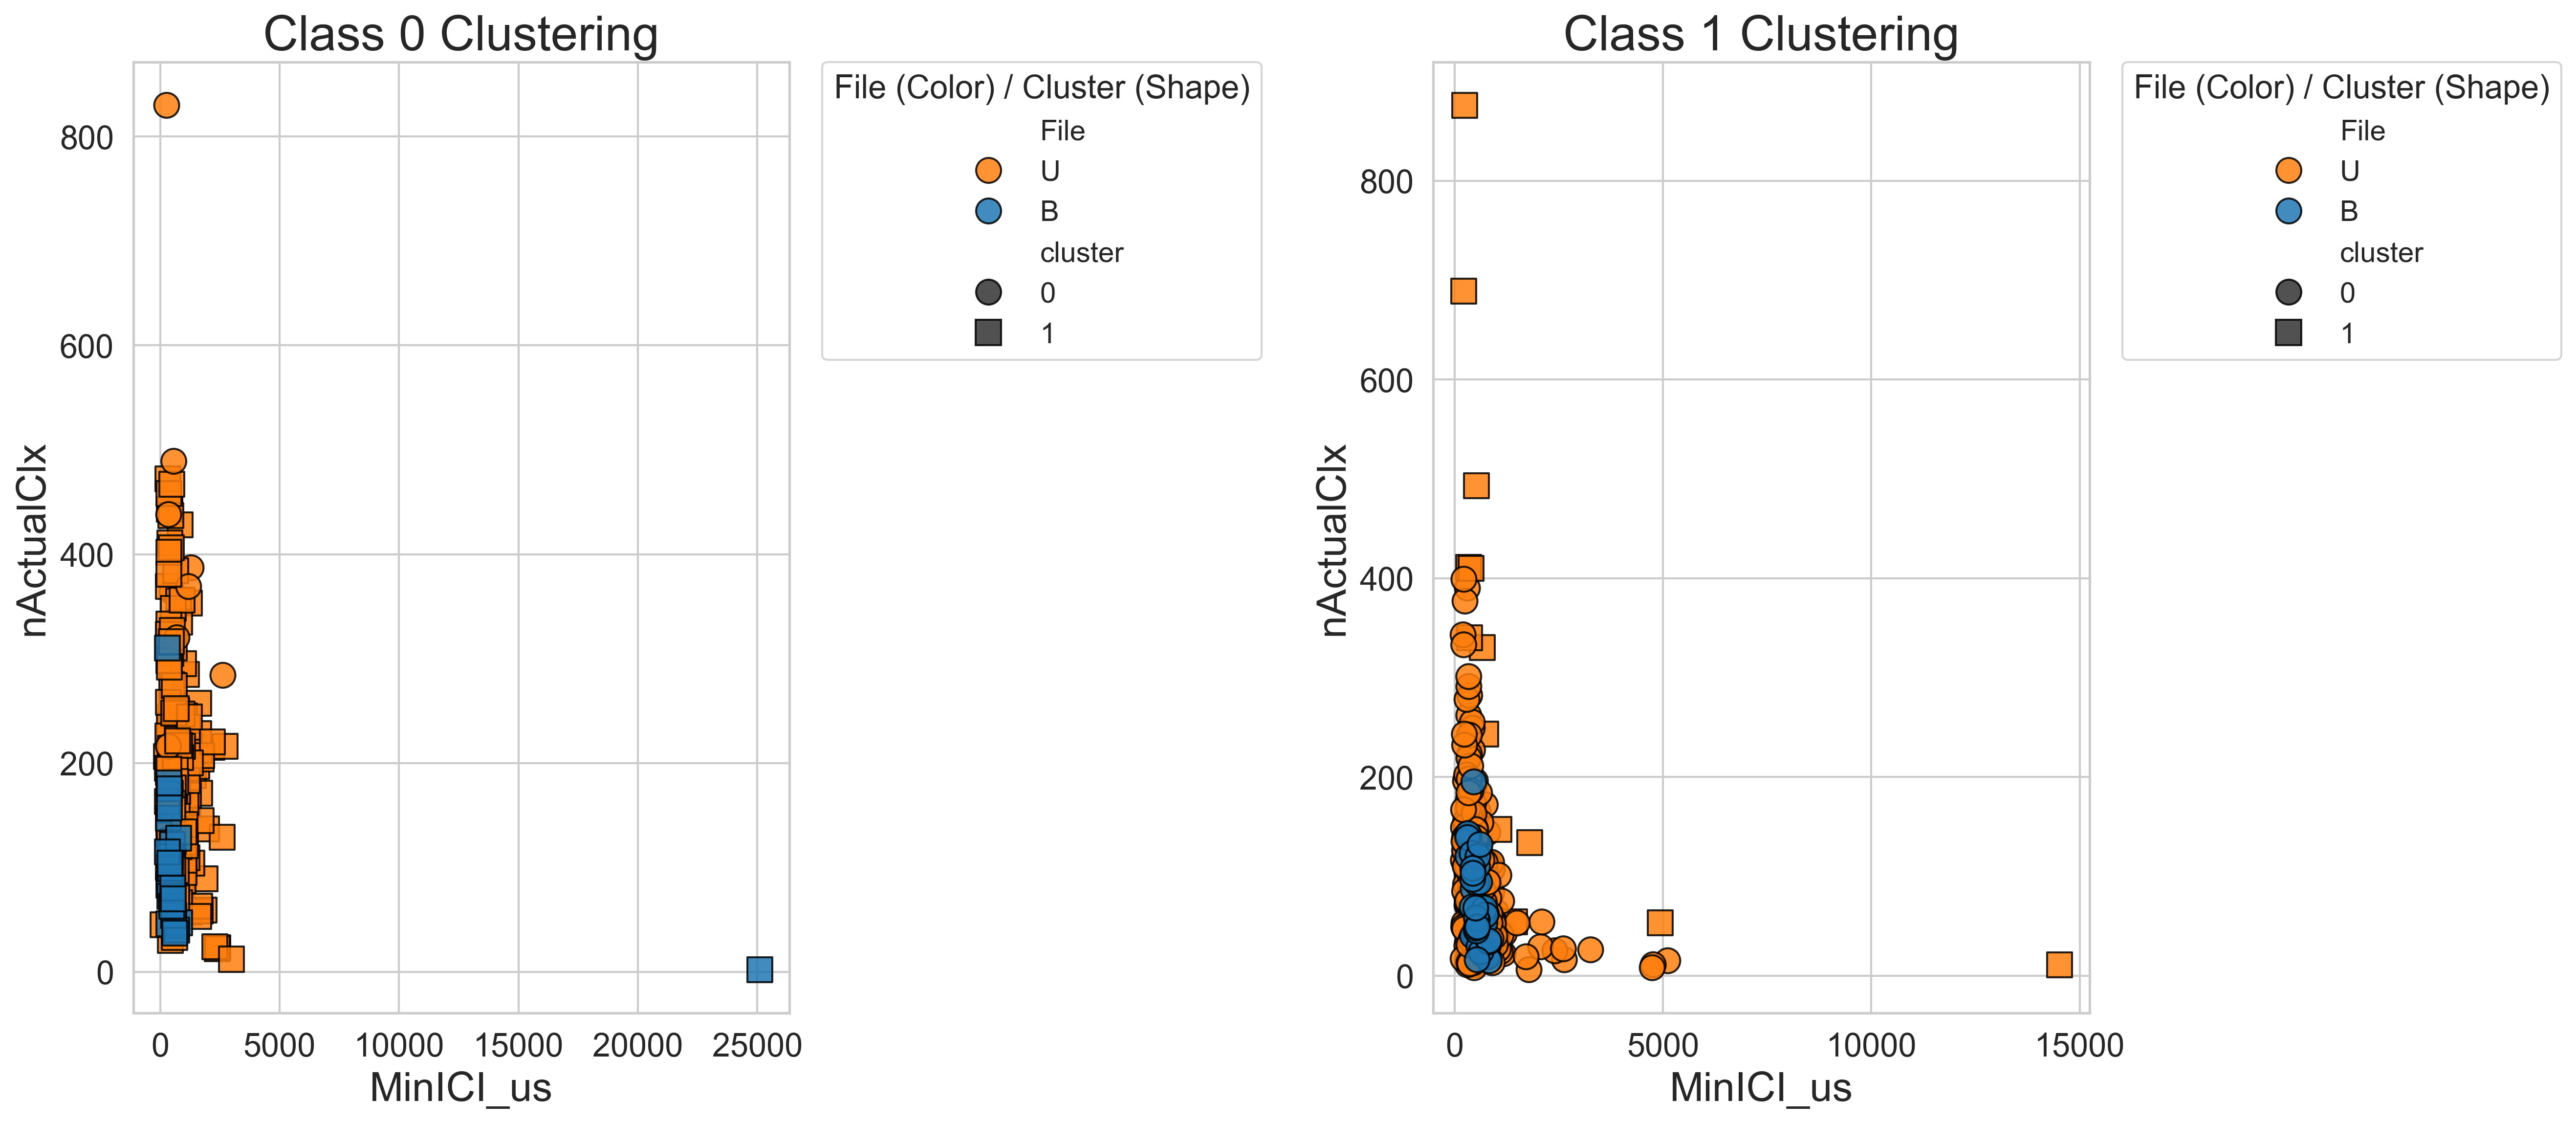

In [42]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif

# Assuming you have x (features), y (labels), meta (metadata with File, Minute, Time)

feature_columns = [
    'ClksThisMin', 'medianKHz', 'avSPL', 'avPkAt', 'AvPRF', 'avEndF',
    'tWUTrisk', 'nActualClx', 'nRisingIPIs', 'TrDur_us', 'nICIrising',
    'MinICI_us', 'midpointICI', 'MaxICI_us', 'ClkNofMinICI', 'ClkNofMaxICI',
    'NofClstrs', 'avClstrNx8', 'avPkIPI', 'BeforeIPIratio', 'PreIPIratio',
    'Post1IPIratio', 'Post2IPIratio', 'EndIPIratio'
]

# Combine everything into one DataFrame
df = pd.DataFrame(x, columns=feature_columns)
df['label'] = y
df['File'] = [s.strip()[0] for s in meta[:, 0]]

# Filter class 0 and class 1
class_0_df = df[df['label'] == 0].copy()
class_1_df = df[df['label'] == 1].copy()

# Perform KMeans clustering for both classes
kmeans_0 = KMeans(n_clusters=2, random_state=42, n_init='auto')
class_0_df['cluster'] = kmeans_0.fit_predict(class_0_df[feature_columns])

kmeans_1 = KMeans(n_clusters=2, random_state=42, n_init='auto')
class_1_df['cluster'] = kmeans_1.fit_predict(class_1_df[feature_columns])

# Create color palettes
unique_files_0 = sorted(class_0_df['File'].unique())
unique_files_1 = sorted(class_1_df['File'].unique())
palette_0 = sns.color_palette("tab10", len(unique_files_0))
palette_1 = sns.color_palette("tab10", len(unique_files_1))

file_color_mapping_0 = dict(zip(unique_files_0, palette_0))
file_color_mapping_1 = dict(zip(unique_files_1, palette_1))

# Compute ANOVA F-values
f_values_0, p_values_0 = f_classif(class_0_df[feature_columns], class_0_df['cluster'])
f_values_1, p_values_1 = f_classif(class_1_df[feature_columns], class_1_df['cluster'])

# Prepare for plotting
sns.set(style="whitegrid")  # Cleaner background
plt.rcParams.update({
    'font.size': 18,       # Larger font
    'axes.titlesize': 22,  # Title size
    'axes.labelsize': 20,  # X and Y label size
    'xtick.labelsize': 16, # Tick size
    'ytick.labelsize': 16,
    'legend.fontsize': 14, # Legend size
    'legend.title_fontsize': 16,
    'figure.dpi': 300,     # High quality
})

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Choose good features for x and y (adjust if needed)
x_feature = 'MinICI_us'  # feature_columns[11]
y_feature = 'nActualClx' # feature_columns[7]

# Plot for Class 0
sns.scatterplot(
    data=class_0_df,
    x=x_feature,
    y=y_feature,
    hue='File',
    style='cluster',
    palette=file_color_mapping_0,
    markers={0: "o", 1: "s"},
    s=150,
    edgecolor="black",
    alpha=0.85,
    ax=axs[0],
    legend='full'
)

axs[0].set_title('Class 0 Clustering', fontsize=24)
axs[0].set_xlabel(x_feature, fontsize=20)
axs[0].set_ylabel(y_feature, fontsize=20)
axs[0].grid(True)
axs[0].legend(title='File (Color) / Cluster (Shape)', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Plot for Class 1
sns.scatterplot(
    data=class_1_df,
    x=x_feature,
    y=y_feature,
    hue='File',
    style='cluster',
    palette=file_color_mapping_1,
    markers={0: "o", 1: "s"},
    s=150,
    edgecolor="black",
    alpha=0.85,
    ax=axs[1],
    legend='full'
)

axs[1].set_title('Class 1 Clustering', fontsize=24)
axs[1].set_xlabel(x_feature, fontsize=20)
axs[1].set_ylabel(y_feature, fontsize=20)
axs[1].grid(True)
axs[1].legend(title='File (Color) / Cluster (Shape)', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Final layout
plt.tight_layout()

# Save in thesis quality
plt.savefig("clustering_class_0_and_1.pdf", bbox_inches='tight', dpi=300)

plt.show()


In [9]:
import numpy as np
import pandas as pd
from scipy import stats

feature_columns = [
    'ClksThisMin', 'medianKHz', 'avSPL', 'avPkAt', 'AvPRF', 'avEndF',
    'tWUTrisk', 'nActualClx', 'nRisingIPIs', 'TrDur_us', 'nICIrising',
    'MinICI_us', 'midpointICI', 'MaxICI_us', 'ClkNofMinICI', 'ClkNofMaxICI',
    'NofClstrs', 'avClstrNx8', 'avPkIPI', 'BeforeIPIratio', 'PreIPIratio',
    'Post1IPIratio', 'Post2IPIratio', 'EndIPIratio'
]

# Split into two DataFrames
df_0 = pd.DataFrame(x[np.where(y == 0)], columns=feature_columns)
df_1 = pd.DataFrame(x[np.where(y == 1)], columns=feature_columns)
print(df_0.shape, df_1.shape)
# Calculate summary statistics for each class
def compute_summary(df):
    return pd.DataFrame({
        'mean': df.mean(),
        'median': df.median(),
        'mode': df.mode().iloc[0],
        'std': df.std(),
        'skewness': df.skew(),
        'kurtosis': df.kurtosis()
    })

summary_0 = compute_summary(df_0)
summary_1 = compute_summary(df_1)

# Combine side-by-side for easy comparison
combined = pd.concat(
    [summary_0.add_suffix('_class0'), summary_1.add_suffix('_class1')],
    axis=1
)

# Optional: reorder for better readability
combined = combined[[col for pair in zip(summary_0.columns+'_class0', summary_1.columns+'_class1') for col in pair]]

# Print nicely
pd.set_option('display.max_columns', None)  # So you see all columns
metrics_1 = ['mean', 'median', 'mode']

# Other three metrics
metrics_2 = ['std', 'skewness', 'kurtosis']

# Columns for each set
columns_1 = [col for col in combined.columns if any(m in col for m in metrics_1)]
columns_2 = [col for col in combined.columns if any(m in col for m in metrics_2)]

# Create the two smaller DataFrames
combined_part1 = combined[columns_1]
combined_part2 = combined[columns_2]

print(combined_part1)


(195, 24) (370, 24)
                 mean_class0    mean_class1  median_class0  median_class1  \
ClksThisMin     1.217267e+03    1392.210815         799.00        555.000   
medianKHz       1.185077e+02     118.002701         119.00        121.000   
avSPL           1.185692e+02      76.737839         109.00         52.000   
avPkAt          3.328205e+00       3.156757           3.00          3.000   
AvPRF           1.262051e+02     368.924316          97.00        341.000   
avEndF          1.206000e+02     120.378380         121.00        124.000   
tWUTrisk        1.179487e-01       0.181081           0.00          0.000   
nActualClx      1.920564e+02      96.105408         176.00         74.000   
nRisingIPIs     6.774872e+01      44.437840          46.00         25.000   
TrDur_us        2.318750e+06  294151.718750     1720338.00     227571.000   
nICIrising      5.394872e+01      38.183784          47.00         31.000   
MinICI_us       9.223128e+02     657.572998         602.

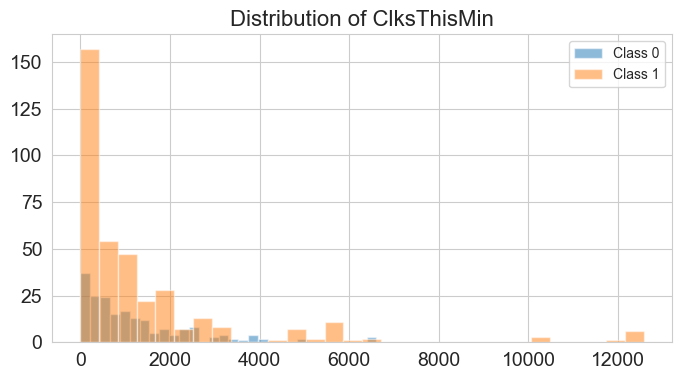

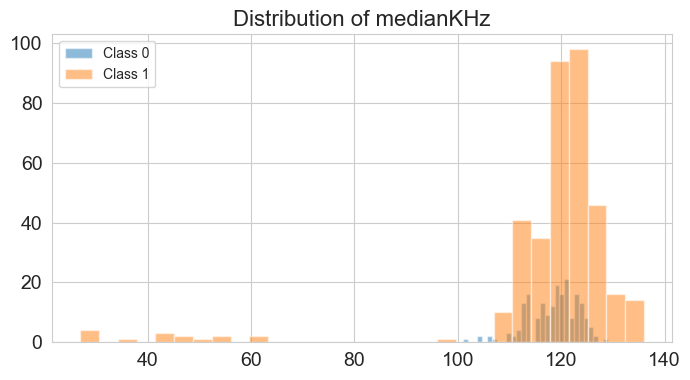

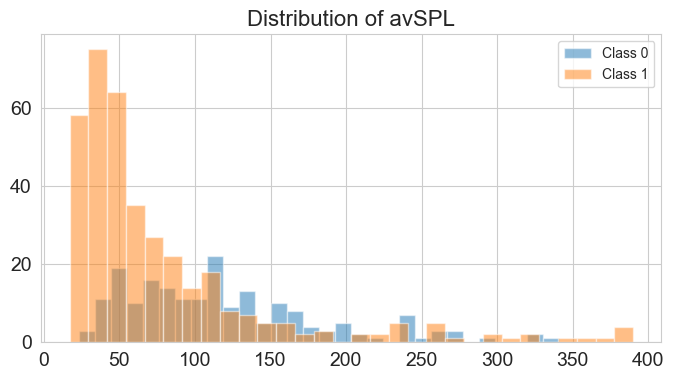

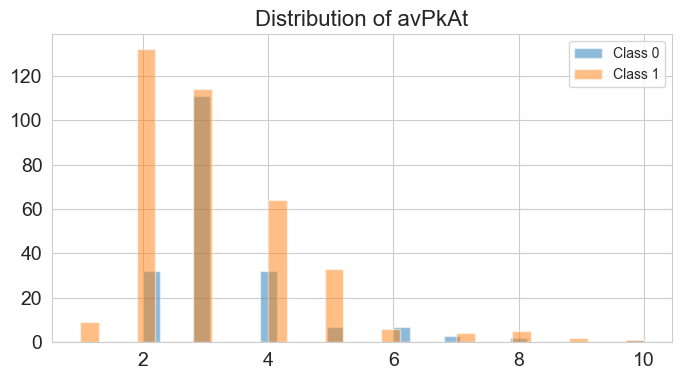

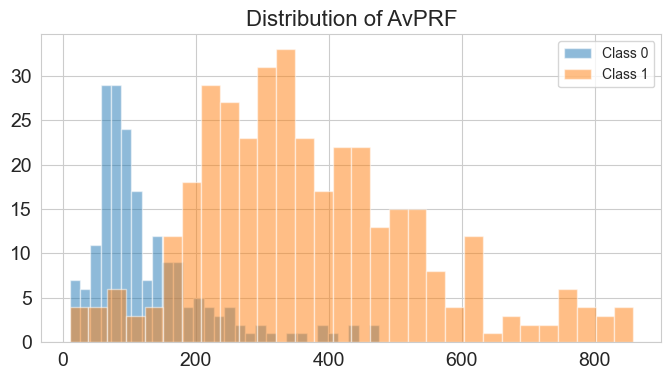

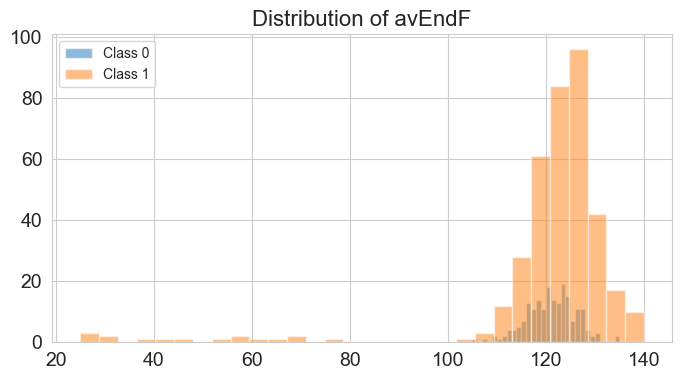

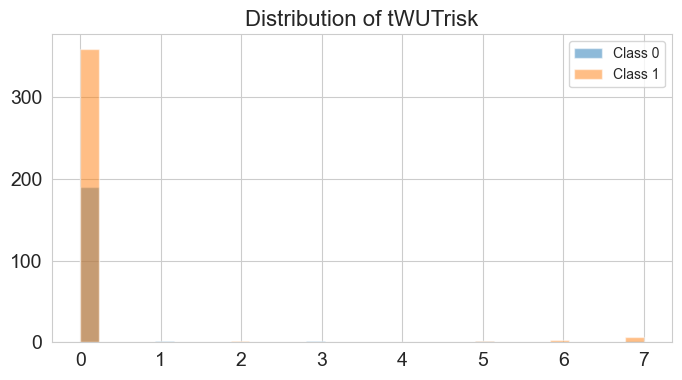

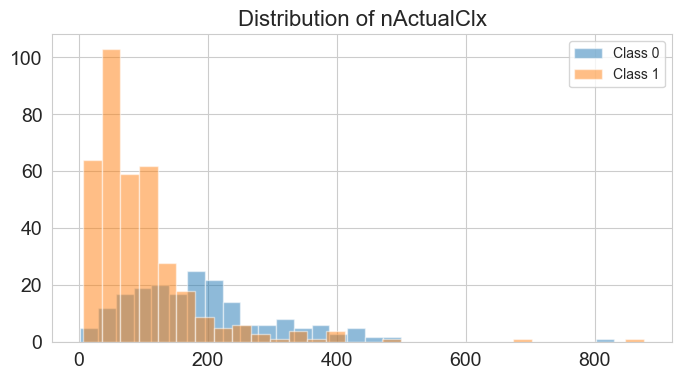

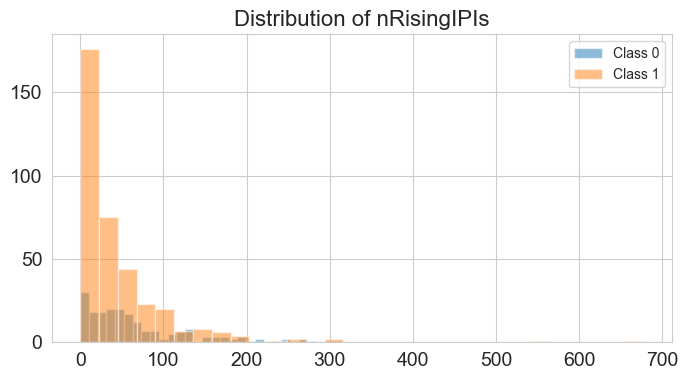

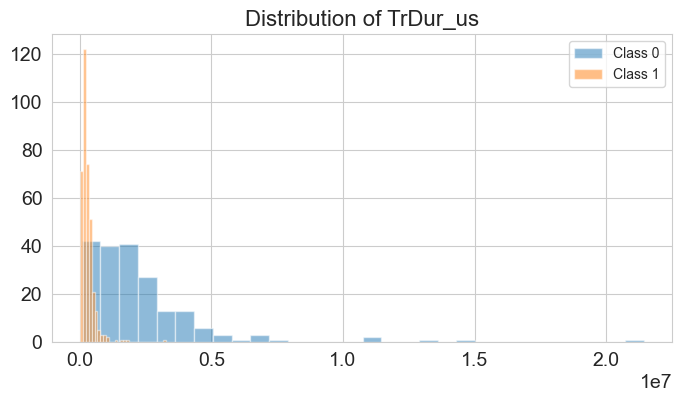

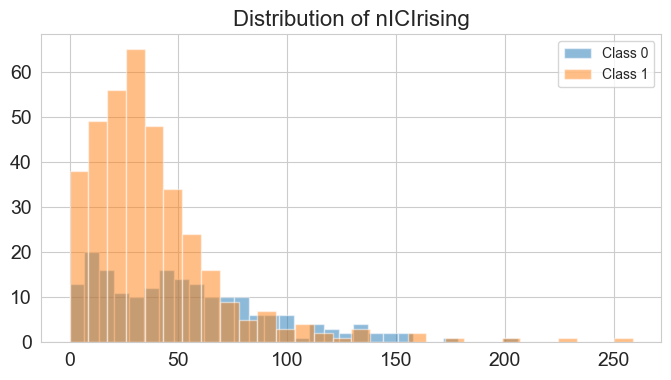

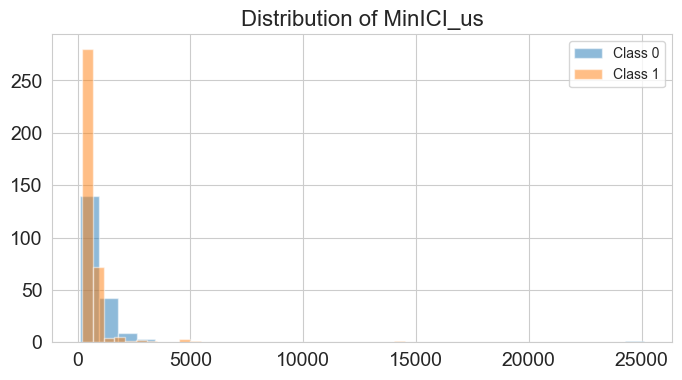

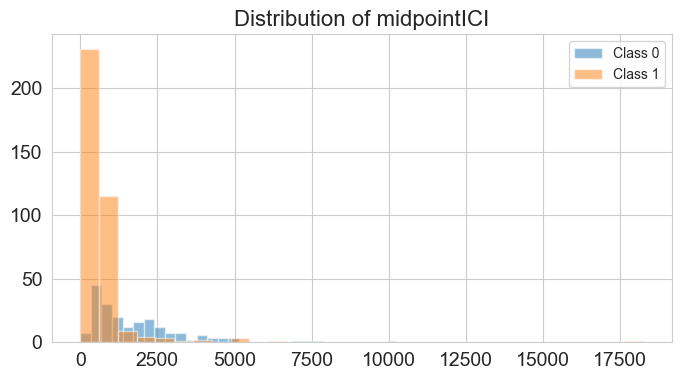

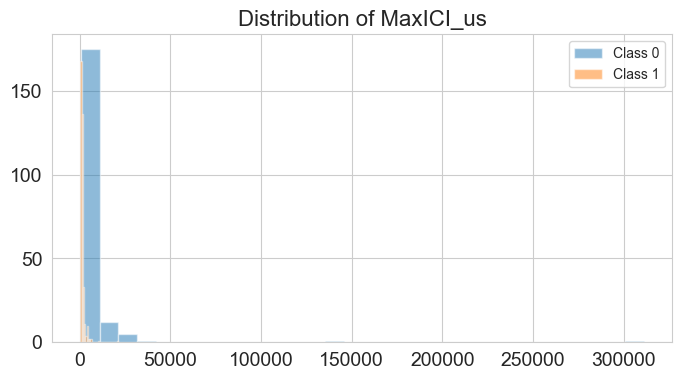

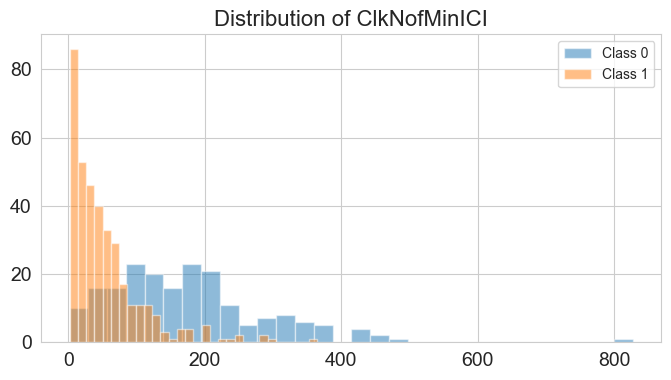

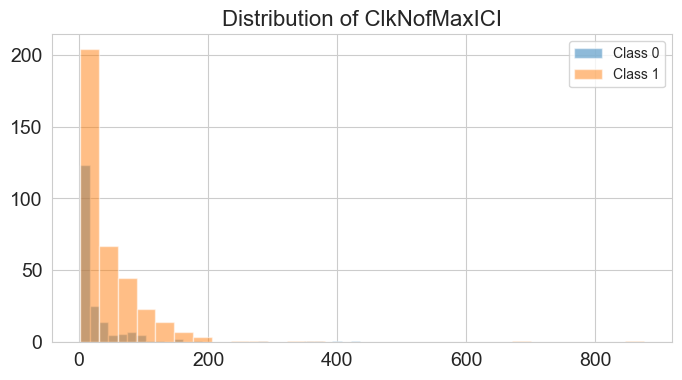

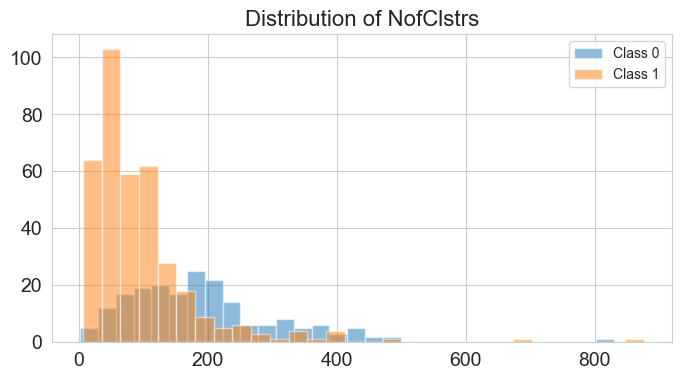

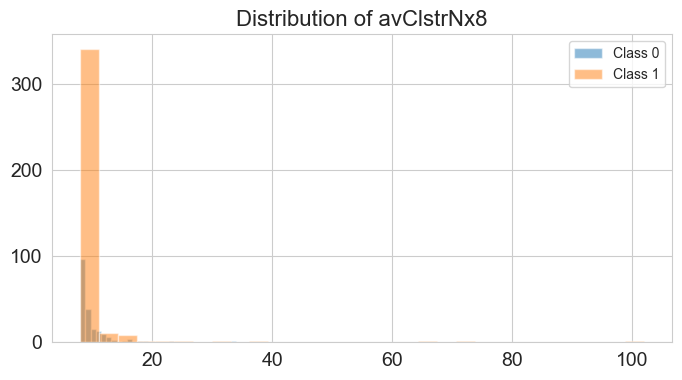

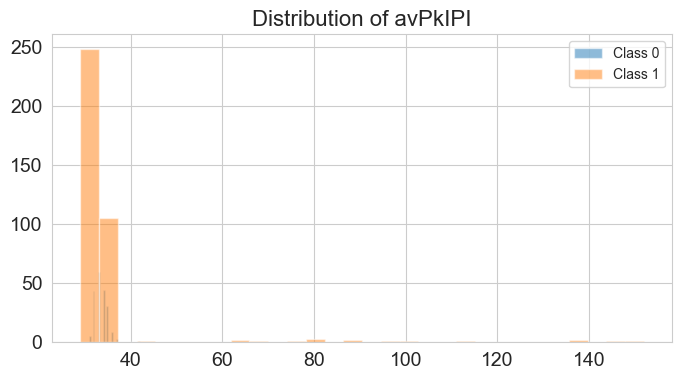

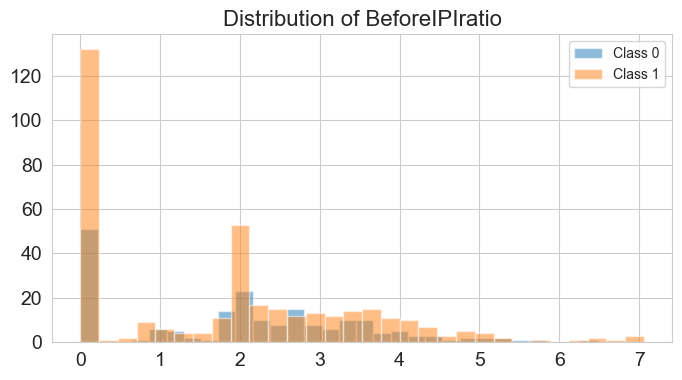

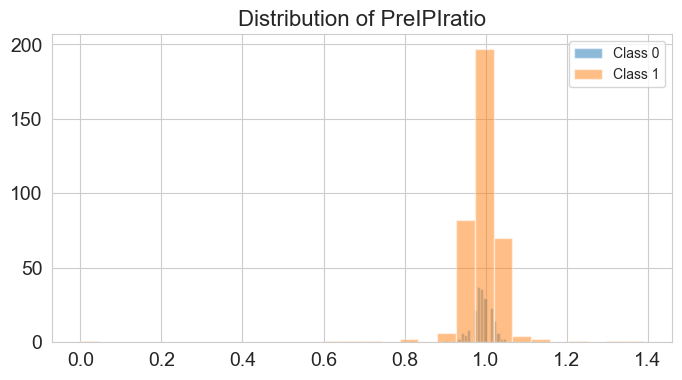

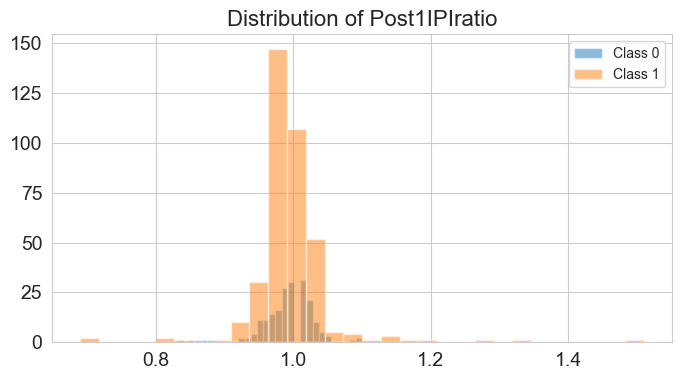

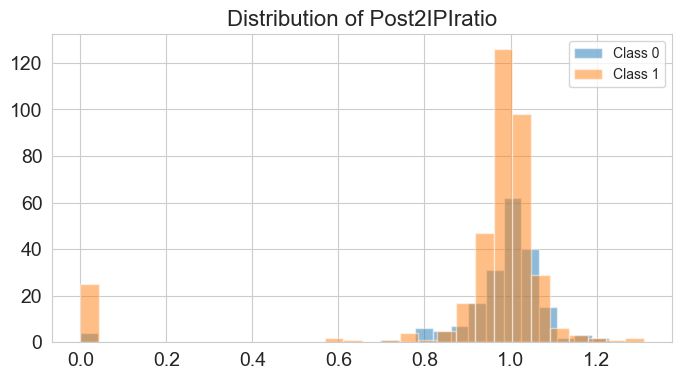

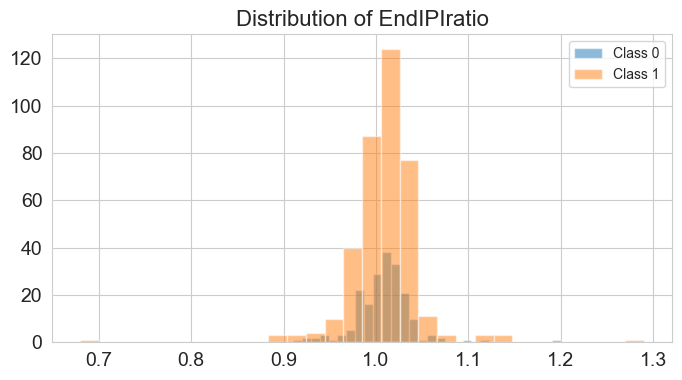

In [21]:
import matplotlib.pyplot as plt

for feature in feature_columns:
    plt.figure(figsize=(8,4))
    plt.hist(df_0[feature], bins=30, alpha=0.5, label='Class 0')
    plt.hist(df_1[feature], bins=30, alpha=0.5, label='Class 1')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()


In [10]:
def cohen_d(x, y):
    return (x.mean() - y.mean()) / np.sqrt((x.std() ** 2 + y.std() ** 2) / 2)

effect_sizes = [(feature, cohen_d(df_0[feature], df_1[feature])) for feature in feature_columns]
effect_sizes_df = pd.DataFrame(effect_sizes, columns=['feature', 'cohen_d']).sort_values('cohen_d', key=np.abs)

print("\nCohen's d (Effect Sizes):")
print(effect_sizes_df)



Cohen's d (Effect Sizes):
           feature   cohen_d
20     PreIPIratio -0.010642
5           avEndF  0.017902
1        medianKHz  0.041732
17      avClstrNx8  0.045980
23     EndIPIratio -0.058796
6         tWUTrisk -0.066423
0      ClksThisMin -0.096401
21   Post1IPIratio -0.097195
3           avPkAt  0.131559
19  BeforeIPIratio  0.135141
11       MinICI_us  0.183516
18         avPkIPI -0.196394
15    ClkNofMaxICI -0.209749
22   Post2IPIratio  0.236201
8      nRisingIPIs  0.354282
13       MaxICI_us  0.403006
10      nICIrising  0.430807
2            avSPL  0.614351
12     midpointICI  0.775675
7       nActualClx  0.915515
16       NofClstrs  0.915515
9         TrDur_us  1.128813
14    ClkNofMinICI  1.348208
4            AvPRF -1.811442


In [11]:
# Perform t-tests or Mann–Whitney U tests to compare distributions

ttest_results = []
mannwhitney_results = []

for feature in feature_columns:
    data0 = df_0[feature].dropna()
    data1 = df_1[feature].dropna()
    
    # t-test (parametric, assumes normal distribution)
    t_stat, t_pval = stats.ttest_ind(data0, data1, equal_var=False)  # Welch's t-test
    
    # Mann-Whitney U test (non-parametric)
    u_stat, u_pval = stats.mannwhitneyu(data0, data1, alternative='two-sided')
    
    ttest_results.append((feature, t_pval))
    mannwhitney_results.append((feature, u_pval))

# Create a DataFrame of the p-values
ttest_df = pd.DataFrame(ttest_results, columns=['feature', 'ttest_pval']).sort_values('ttest_pval')
mannwhitney_df = pd.DataFrame(mannwhitney_results, columns=['feature', 'mannwhitney_pval']).sort_values('mannwhitney_pval')

# Display
print("\nT-test Results (sorted by p-value):")
print(ttest_df)

print("\nMann-Whitney U Test Results (sorted by p-value):")
print(mannwhitney_df)



T-test Results (sorted by p-value):
           feature    ttest_pval
4            AvPRF  1.145261e-80
14    ClkNofMinICI  9.446202e-33
9         TrDur_us  9.101477e-23
7       nActualClx  1.850912e-20
16       NofClstrs  1.850912e-20
12     midpointICI  1.451667e-15
2            avSPL  8.471029e-12
10      nICIrising  3.313926e-06
8      nRisingIPIs  7.629956e-05
13       MaxICI_us  9.616561e-05
22   Post2IPIratio  4.180528e-03
18         avPkIPI  8.135793e-03
15    ClkNofMaxICI  1.553217e-02
11       MinICI_us  5.779190e-02
19  BeforeIPIratio  1.216563e-01
3           avPkAt  1.287759e-01
0      ClksThisMin  2.346412e-01
21   Post1IPIratio  2.419275e-01
6         tWUTrisk  4.343928e-01
23     EndIPIratio  4.941942e-01
17      avClstrNx8  5.575665e-01
1        medianKHz  5.834955e-01
5           avEndF  8.141242e-01
20     PreIPIratio  8.903747e-01

Mann-Whitney U Test Results (sorted by p-value):
           feature  mannwhitney_pval
9         TrDur_us      9.763886e-70
13       MaxIC

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Determine top 5 features with smallest Mann-Whitney p-values
top5_df = mannwhitney_df.sort_values('mannwhitney_pval').head(5)
top_features = top5_df['feature'].values
p_values = top5_df['mannwhitney_pval'].values

# Create 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
sns.set_style("whitegrid")

# Increase font sizes for readability
plt.rc('axes', titlesize=16, labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

# Plot each of the top 5 features
for i, (feature, pval) in enumerate(zip(top_features, p_values)):
    ax = axes[i // 3, i % 3]
    # Combine Class 0 and Class 1 data for the feature
    data = pd.concat([
        df_0[[feature]].assign(Class='Class 0'),
        df_1[[feature]].assign(Class='Class 1')
    ])
    # Draw boxplot
    sns.violinplot(x='Class', y=feature, data=data, ax=ax)
    # Set title with feature name and p-value
    ax.set_title(f"{feature} (p = {pval:.3e})")
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='major', labelsize=14)

# Hide the unused subplot (bottom-right)
axes[1, 2].axis('off')

# Overall figure title
fig.suptitle('Top Features Differentiating Class 0 and Class 1', fontsize=18)

# Adjust layout and save as high-quality PDF
plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.patch.set_facecolor('white')
plt.savefig("top_features_plot.pdf", format='pdf', dpi=300, bbox_inches='tight', facecolor='white')
plt.close(fig)


In [83]:
latex_part1 = combined_part1.to_latex(index=True, float_format="%.3f", escape=False, longtable=False, caption="Feature statistics by class. Part 1", label="tab:feature_stats1", bold_rows=True)
latex_part2 = combined_part2.to_latex(index=True, float_format="%.3f", escape=False, longtable=False, caption="Feature statistics by class. Part 2", label="tab:feature_stats2", bold_rows=True)
print(latex_part1)
print(latex_part2)

\begin{table}
\caption{Feature statistics by class. Part 1}
\label{tab:feature_stats1}
\begin{tabular}{lrrrrrr}
\toprule
 & mean_class0 & mean_class1 & median_class0 & median_class1 & mode_class0 & mode_class1 \\
\midrule
\textbf{ClksThisMin} & 1217.267 & 1392.211 & 799.000 & 555.000 & 545.000 & 1950.000 \\
\textbf{medianKHz} & 118.508 & 118.003 & 119.000 & 121.000 & 121.000 & 121.000 \\
\textbf{avSPL} & 118.569 & 76.738 & 109.000 & 52.000 & 73.000 & 32.000 \\
\textbf{avPkAt} & 3.328 & 3.157 & 3.000 & 3.000 & 3.000 & 2.000 \\
\textbf{AvPRF} & 126.205 & 368.924 & 97.000 & 341.000 & 95.000 & 185.000 \\
\textbf{avEndF} & 120.600 & 120.378 & 121.000 & 124.000 & 123.000 & 125.000 \\
\textbf{tWUTrisk} & 0.118 & 0.181 & 0.000 & 0.000 & 0.000 & 0.000 \\
\textbf{nActualClx} & 192.056 & 96.105 & 176.000 & 74.000 & 194.000 & 54.000 \\
\textbf{nRisingIPIs} & 67.749 & 44.438 & 46.000 & 25.000 & 4.000 & 1.000 \\
\textbf{TrDur_us} & 2318750.500 & 294151.719 & 1720338.000 & 227571.000 & 1000000.000 & 

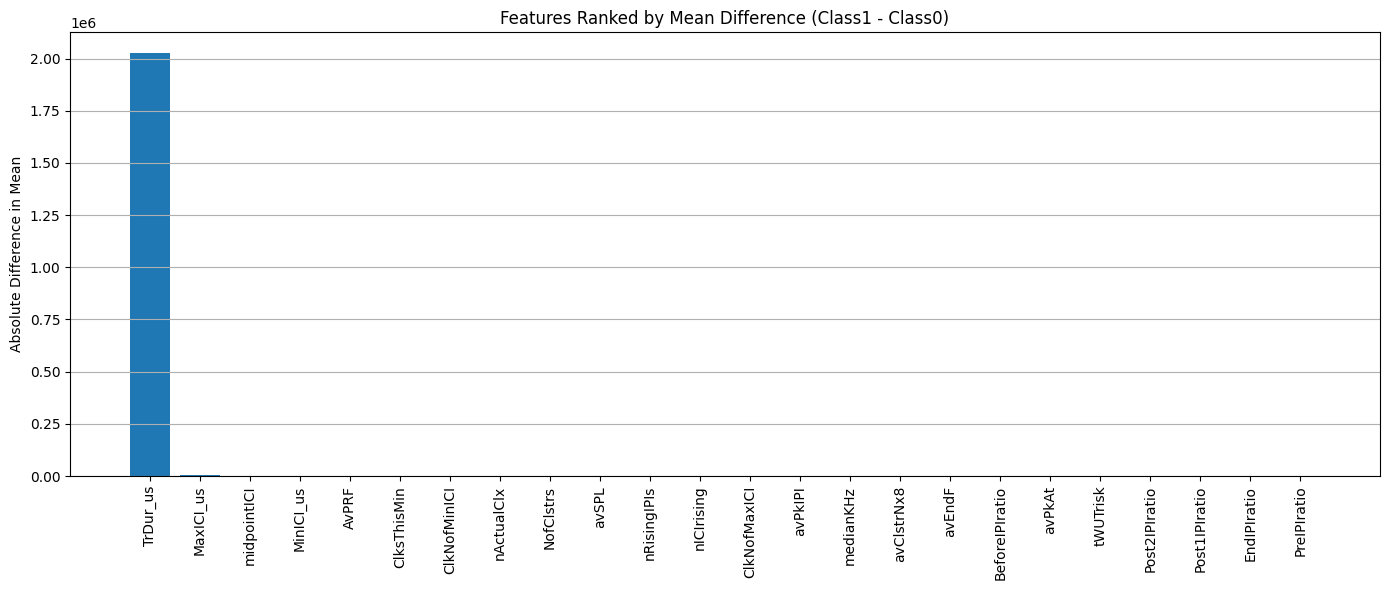

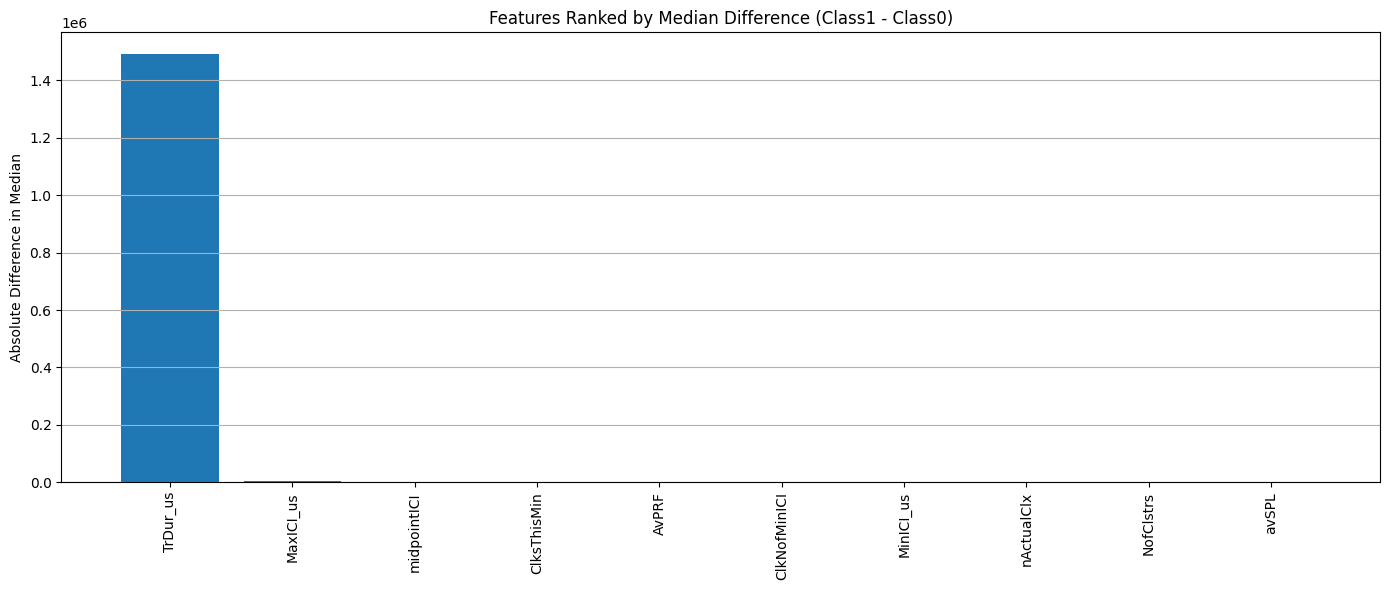

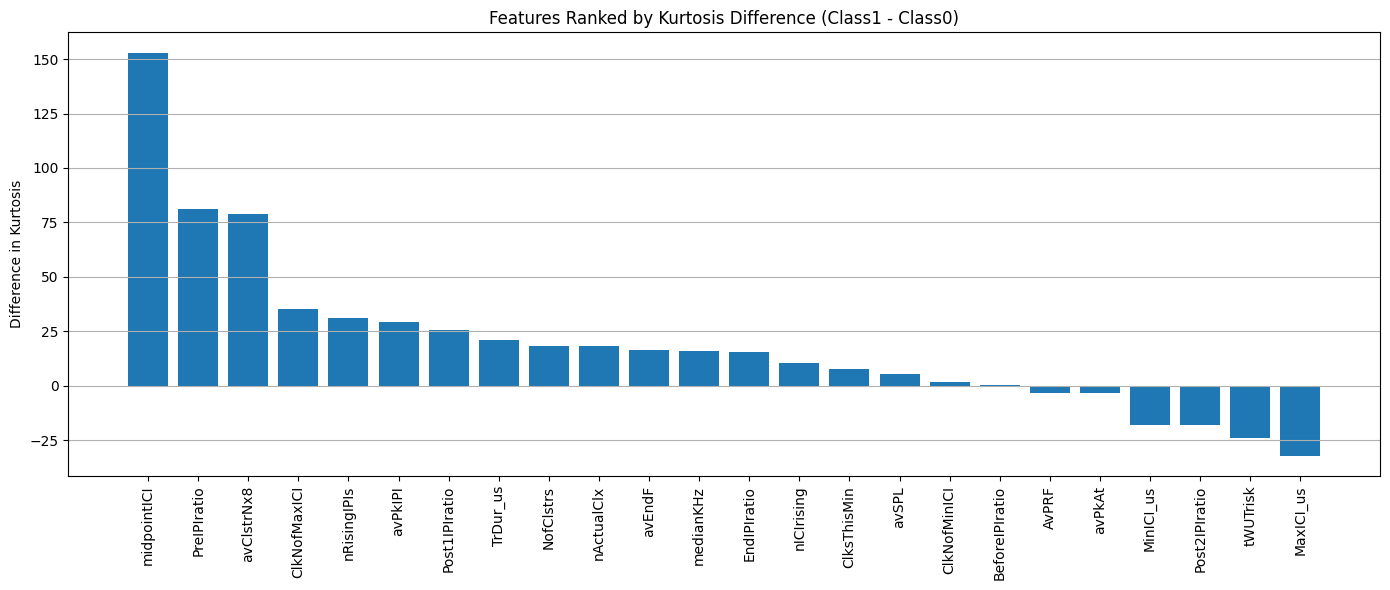

midpointICI       153.035110
PreIPIratio        81.044144
avClstrNx8         78.723999
ClkNofMaxICI       35.220520
nRisingIPIs        31.227955
avPkIPI            29.200256
Post1IPIratio      25.768551
TrDur_us           20.736467
NofClstrs          18.019127
nActualClx         18.019127
avEndF             16.583179
medianKHz          15.855115
EndIPIratio        15.408104
nICIrising         10.314989
ClksThisMin         7.607663
avSPL               5.457076
ClkNofMinICI        1.545381
BeforeIPIratio      0.254526
AvPRF              -3.267700
avPkAt             -3.299291
MinICI_us         -18.278641
Post2IPIratio     -18.286621
tWUTrisk          -24.120579
MaxICI_us         -32.259392
dtype: float32

In [79]:
import matplotlib.pyplot as plt

def rank_features(combined_df, stat='mean', top_n=None, absolute=True, figsize=(14, 6)):
    """
    Rank features by difference in a specific statistic between class1 and class0.
    
    Args:
        combined_df (pd.DataFrame): DataFrame with stats like 'mean_class0', 'mean_class1', etc.
        stat (str): Which statistic to compare ('mean', 'median', 'std', 'skewness', 'kurtosis', etc.).
        top_n (int or None): If set, only show top N features. If None, show all.
        absolute (bool): Whether to sort by absolute difference (default True).
        figsize (tuple): Size of the plot.
    """
    # 1. Calculate difference
    diff = combined_df[f'{stat}_class1'] - combined_df[f'{stat}_class0']
    
    # 2. Optionally take absolute value
    if absolute:
        diff = diff.abs()
    
    # 3. Sort features by difference
    sorted_diff = diff.sort_values(ascending=False)
    
    # 4. Limit to top N if needed
    if top_n is not None:
        sorted_diff = sorted_diff.head(top_n)
    
    # 5. Plot
    plt.figure(figsize=figsize)
    plt.bar(sorted_diff.index, sorted_diff.values)
    plt.xticks(rotation=90)
    plt.ylabel(f"{'Absolute ' if absolute else ''}Difference in {stat.capitalize()}")
    plt.title(f"Features Ranked by {stat.capitalize()} Difference (Class1 - Class0)")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    
    # 6. Also return sorted table if needed
    return sorted_diff

# Rank features by biggest difference in mean
rank_features(combined, stat='mean')

# Rank features by difference in median (only top 10)
rank_features(combined, stat='median', top_n=10)

# Rank features by skewness difference (not absolute, to see direction)
rank_features(combined, stat='kurtosis', absolute=False)


['B' 'U']
   File        Feature          Test  Statistic       P-value
1     B      medianKHz  Mann-Whitney      137.5  4.524721e-06
2     B          avSPL  Mann-Whitney      745.5  6.279400e-05
3     B         avPkAt  Mann-Whitney      316.0  2.781865e-02
4     B          AvPRF  Mann-Whitney       61.0  1.502394e-08
5     B         avEndF  Mann-Whitney      179.5  6.543284e-05
7     B     nActualClx  Mann-Whitney      620.0  2.598393e-02
9     B       TrDur_us  Mann-Whitney      873.0  6.535438e-09
10    B     nICIrising  Mann-Whitney      125.5  2.020712e-06
11    B      MinICI_us  Mann-Whitney      289.0  1.475312e-02
13    B      MaxICI_us  Mann-Whitney      857.0  2.454390e-08
14    B   ClkNofMinICI  Mann-Whitney      814.0  6.720423e-07
15    B   ClkNofMaxICI  Mann-Whitney      219.5  5.749869e-04
16    B      NofClstrs  Mann-Whitney      620.0  2.598393e-02
18    B        avPkIPI  Mann-Whitney      766.0  1.301370e-05
24    U    ClksThisMin  Mann-Whitney    31621.5  3.495822e-0

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
import umap
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

# from caret import 



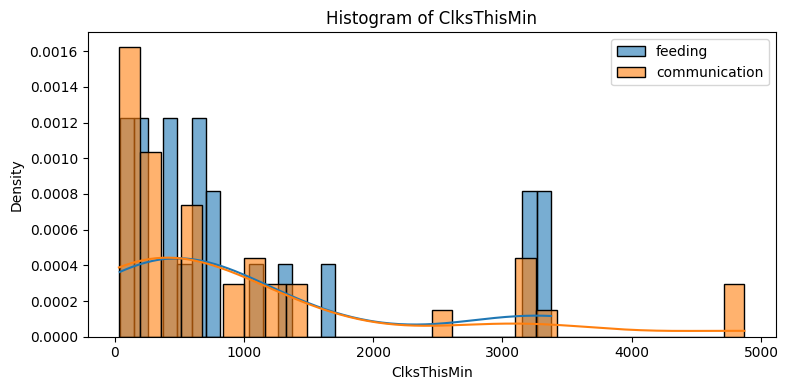

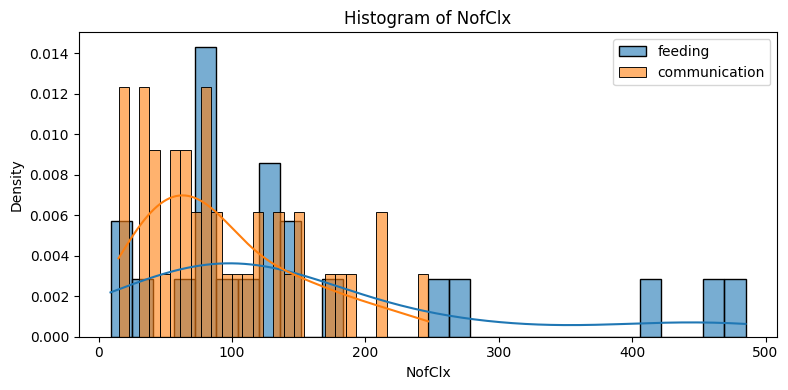

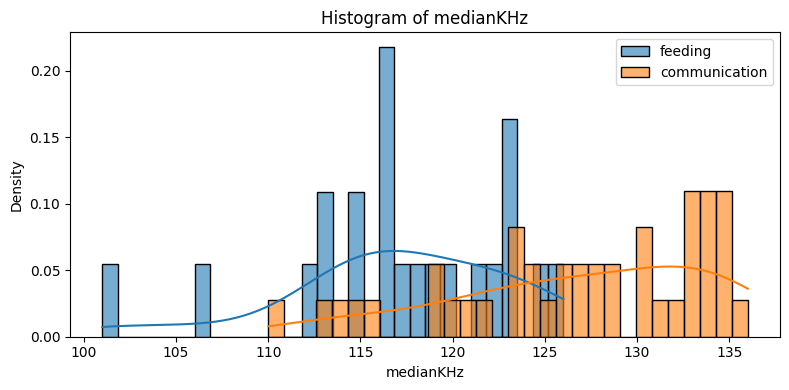

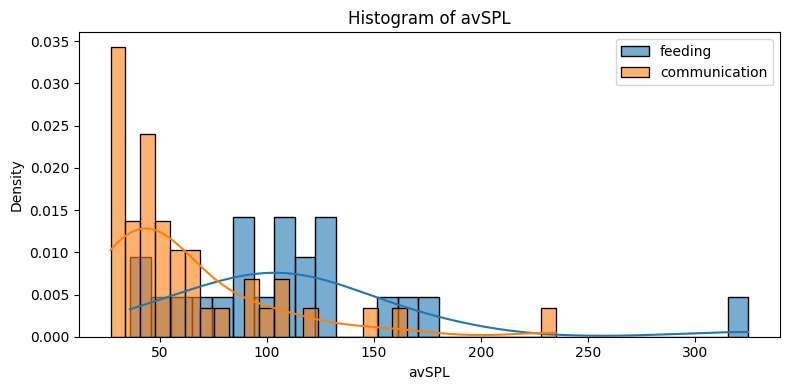

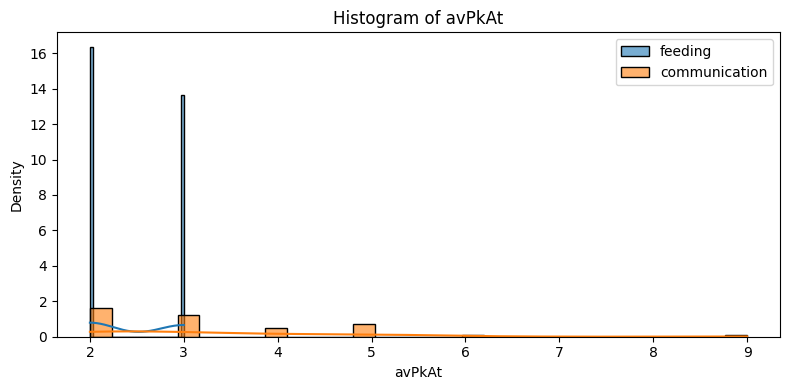

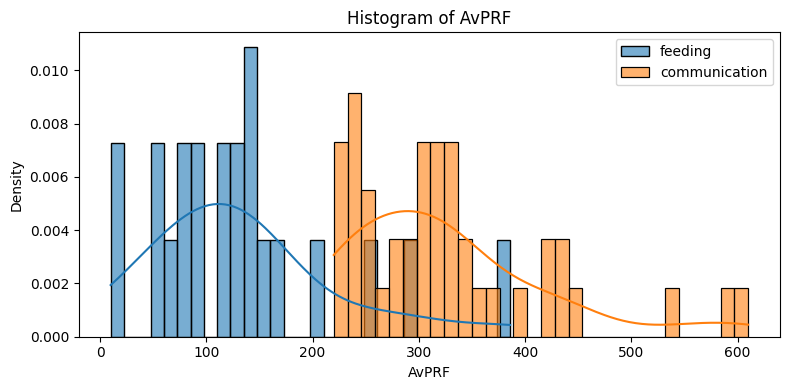

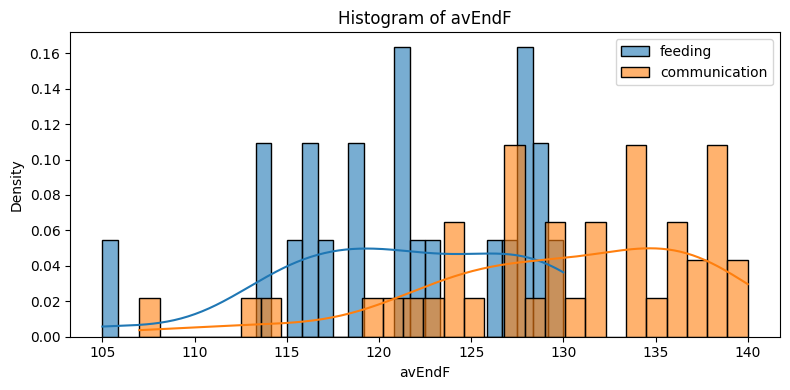

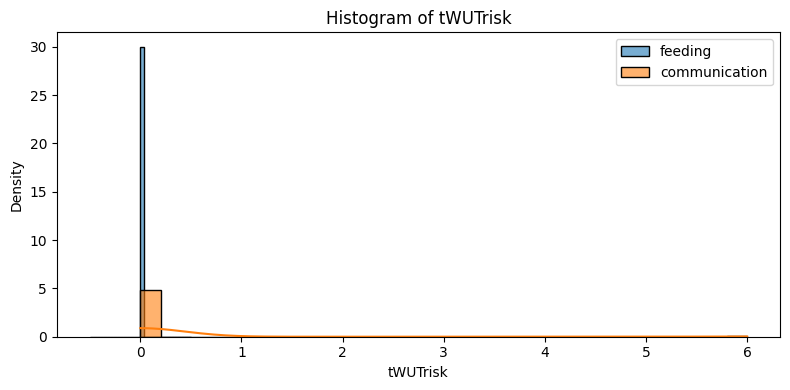

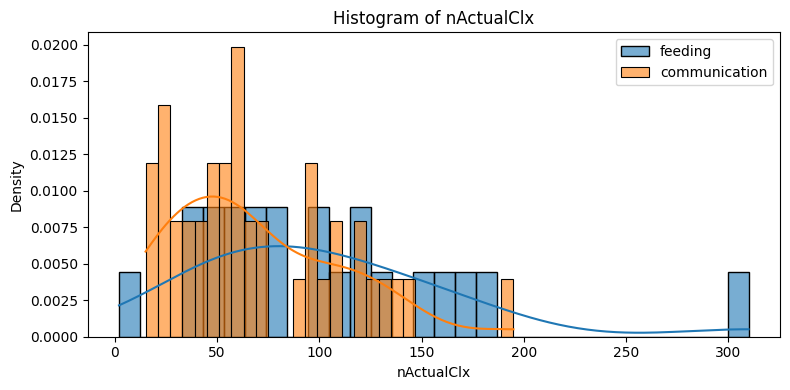

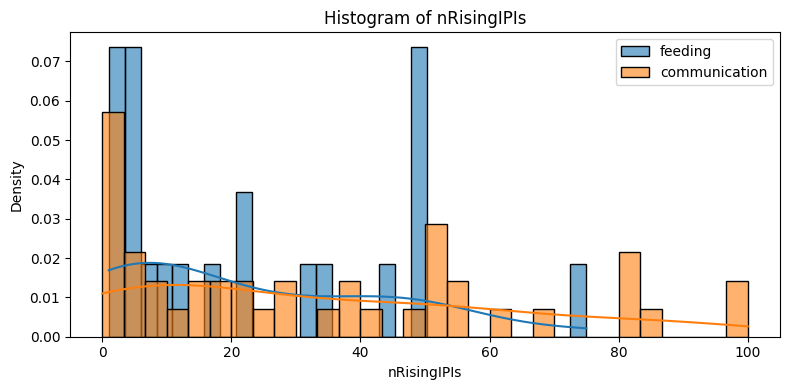

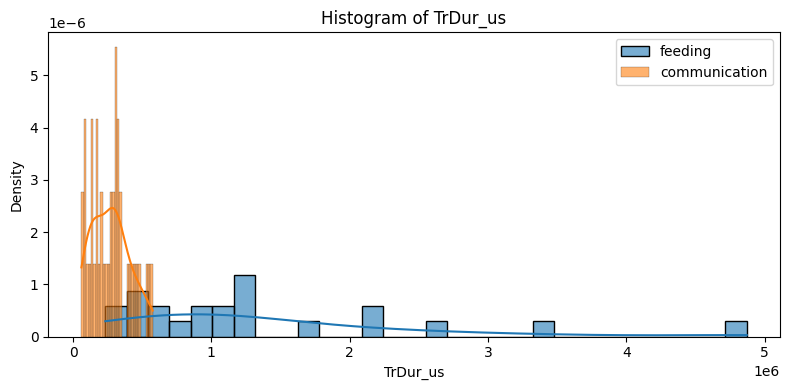

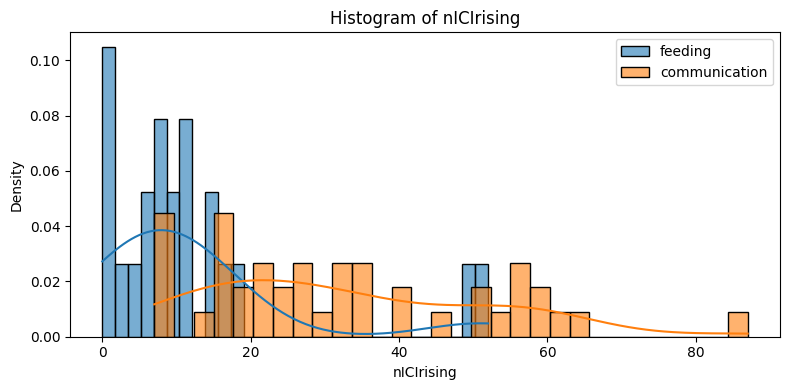

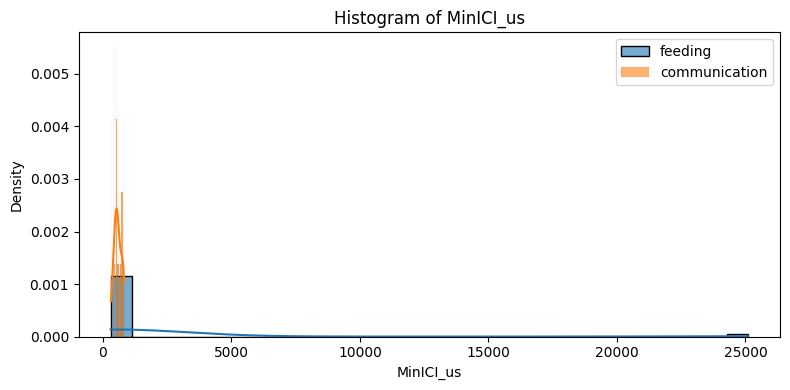

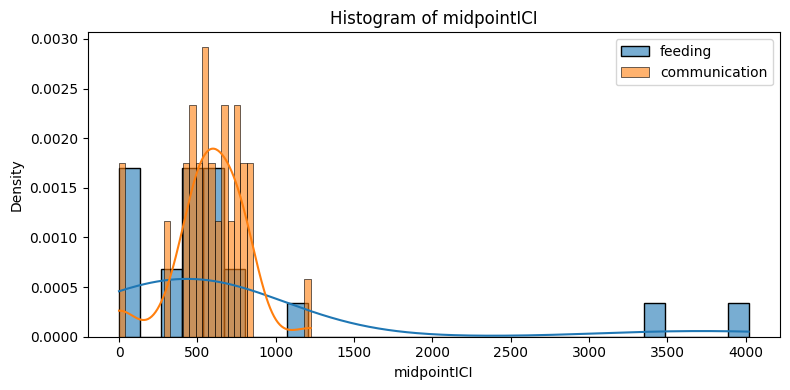

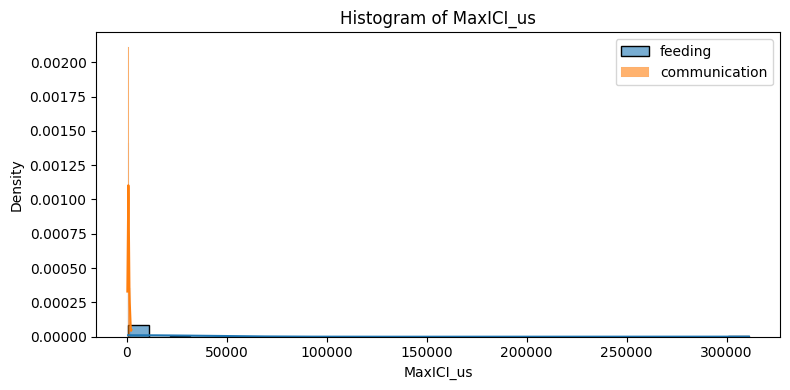

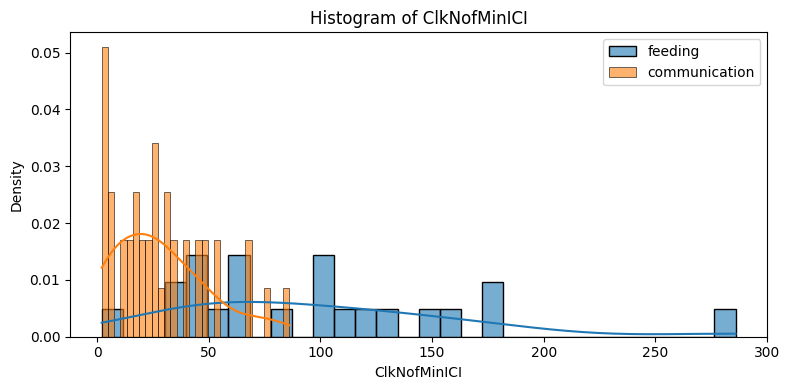

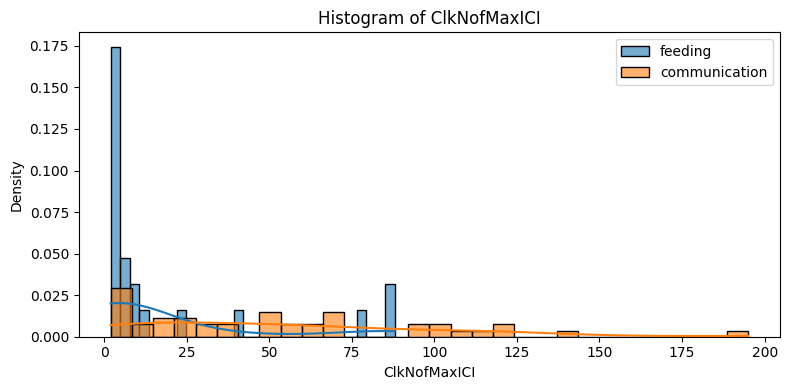

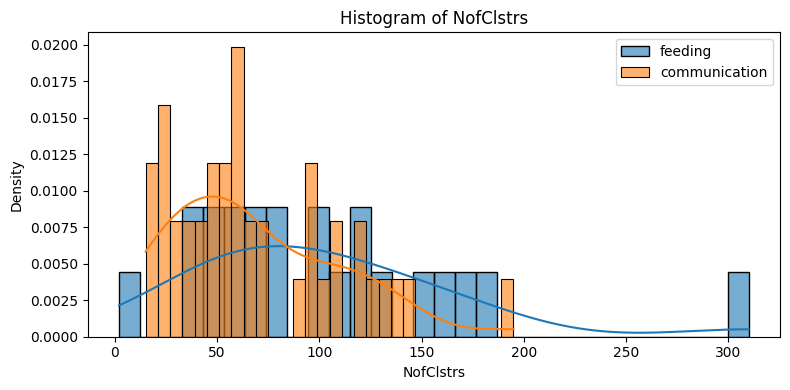

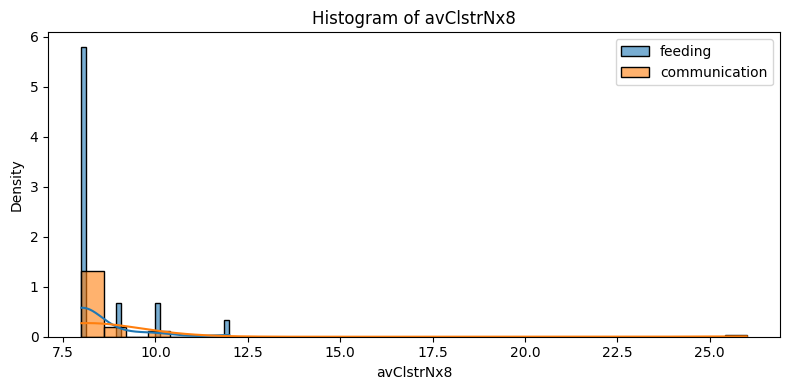

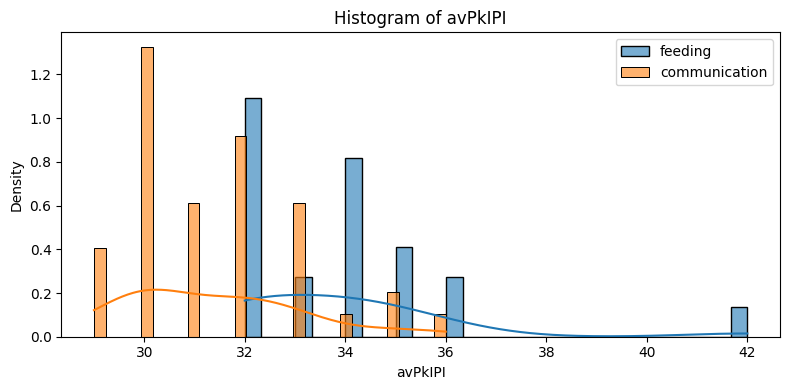

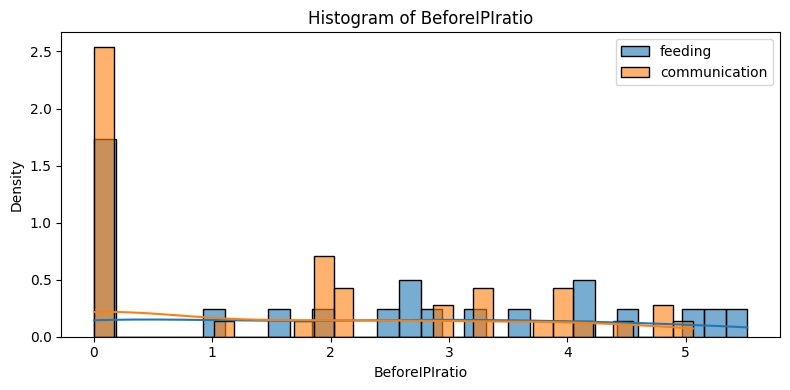

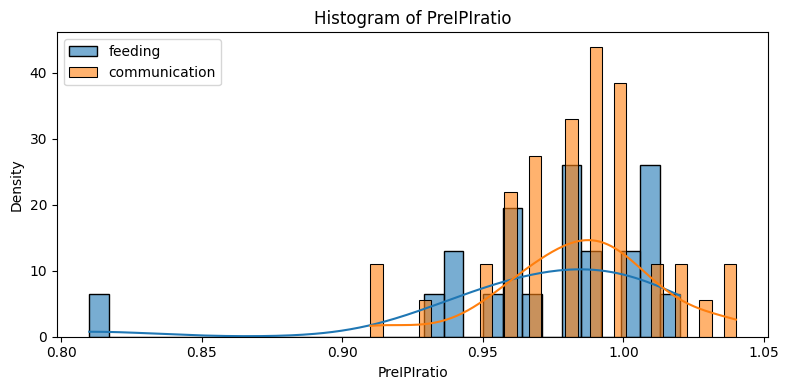

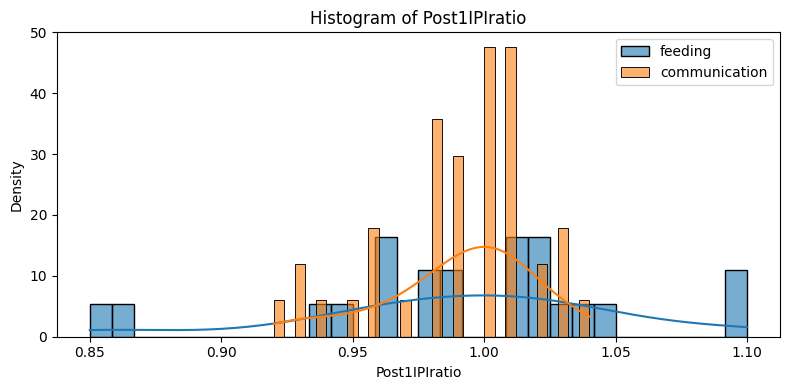

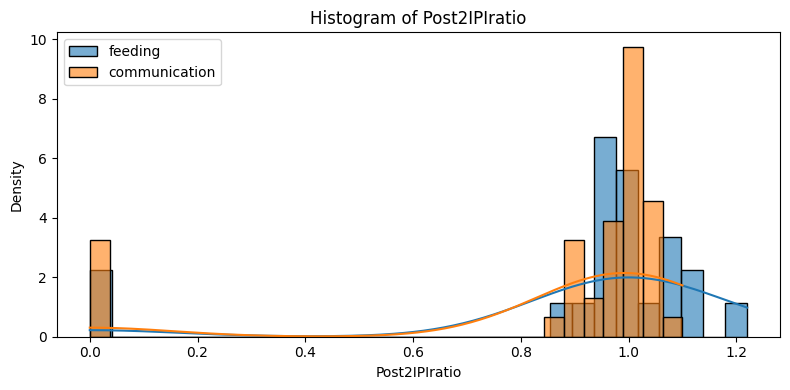

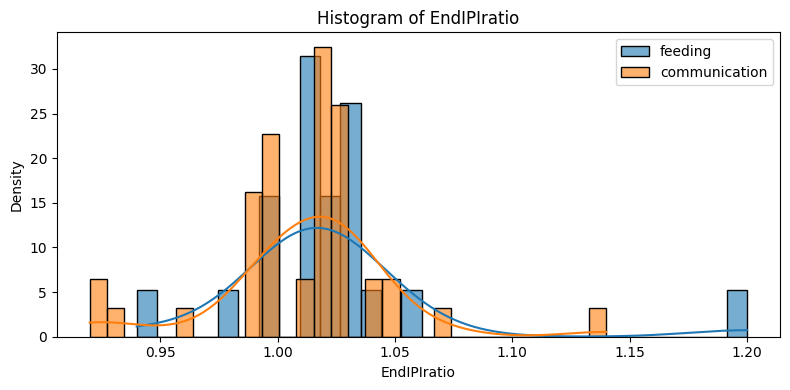

In [20]:
feature_columns = [
            'ClksThisMin', 'medianKHz', 'avSPL', 'avPkAt', 'AvPRF', 'avEndF',
            'tWUTrisk', 'nActualClx', 'nRisingIPIs', 'TrDur_us', 'nICIrising',
            'MinICI_us', 'midpointICI', 'MaxICI_us', 'ClkNofMinICI', 'ClkNofMaxICI',
            'NofClstrs', 'avClstrNx8', 'avPkIPI', 'BeforeIPIratio', 'PreIPIratio',
            'Post1IPIratio', 'Post2IPIratio', 'EndIPIratio'
        ]

df = pd.DataFrame(test_x, columns=feature_columns)

df['label'] = test_y
df['zone'] = test_meta[:, 0]
# Optional: class names
class_names = ['feeding', 'communication']
df['label_name'] = df['label'].map(dict(zip([0, 1], class_names)))

def plot_feature_histograms(data, features, labels, class_names):
    for feature in features:
        plt.figure(figsize=(8, 4))
        for label in np.unique(labels):
            subset = data[data['label'] == label]
            sns.histplot(subset[feature], label=class_names[label], kde=True, stat='density', bins=30, alpha=0.6)
        plt.title(f"Histogram of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Density")
        plt.legend()
        plt.tight_layout()
        plt.show()


plot_feature_histograms(df, feature_columns, df['label'], class_names)

In [39]:
data = np.load("data_files/full_acoustic_dataset.npz", allow_pickle=True)
labeled_x = data['labeled_x']
labeled_y = data['labeled_y']
unlabeled_x = data['unlabeled_x']
unlabeled_meta = data['unlabeled_meta']
labeled_meta = data['labeled_meta']

labeled_y = np.concatenate([labeled_y, test_y])
labeled_x = np.concatenate([labeled_x, test_x])
labeled_meta = np.concatenate([labeled_meta, test_meta])
unlabeled_df = pd.DataFrame(unlabeled_x, columns=feature_columns)
unlabeled_df['zone'] = [s.strip()[0] for s in unlabeled_meta[:, 0]]


labeled_df = pd.DataFrame(labeled_x, columns=feature_columns)
labeled_df['label'] = labeled_y
plot_feature_histograms(labeled_df, feature_columns, labeled_df['label'], class_names)


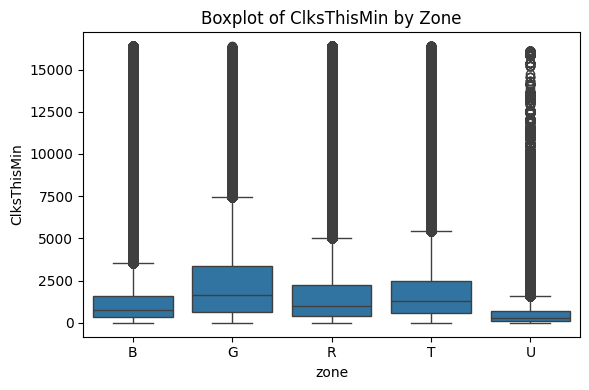

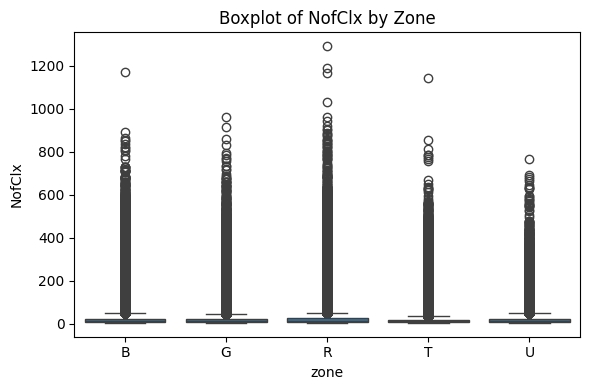

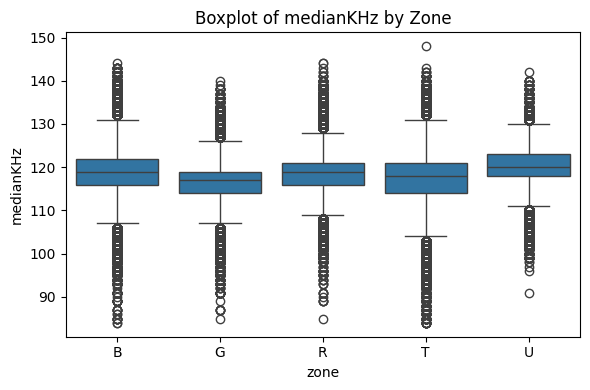

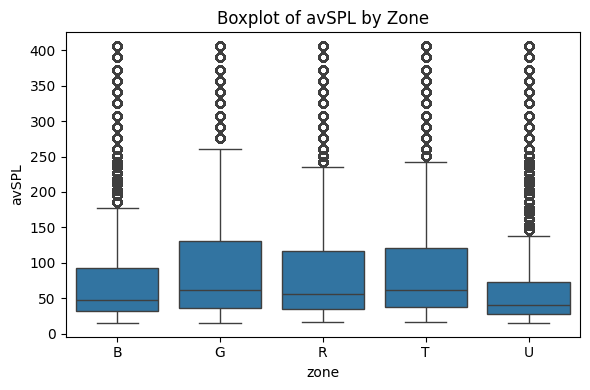

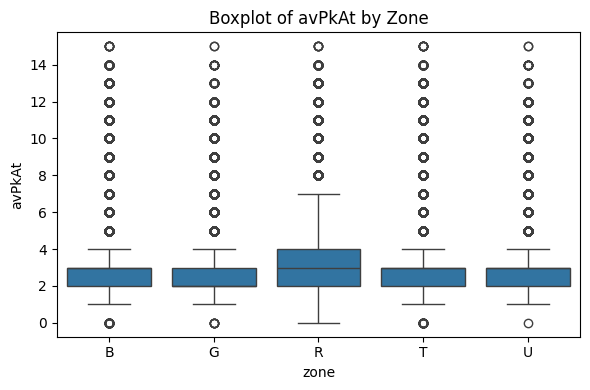

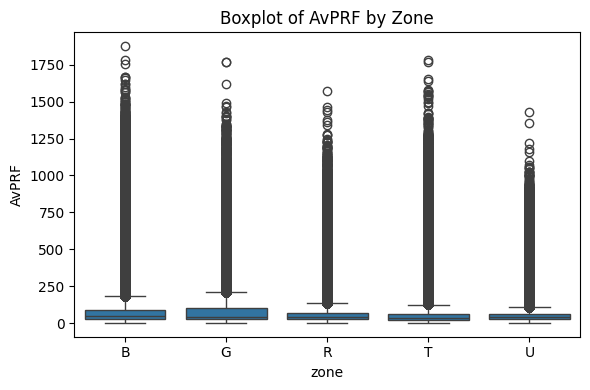

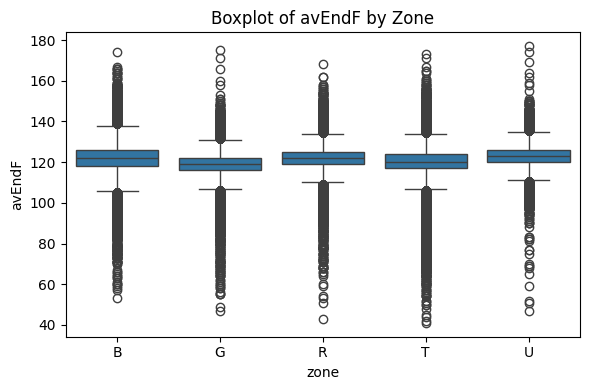

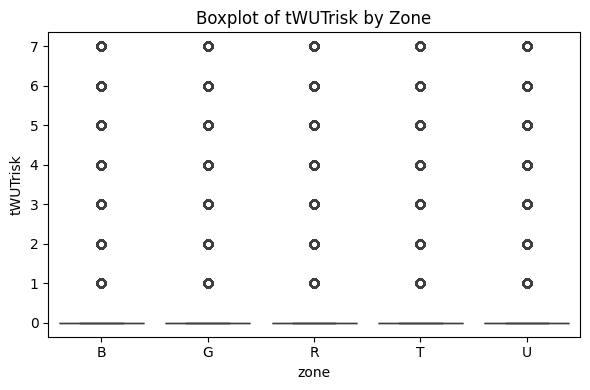

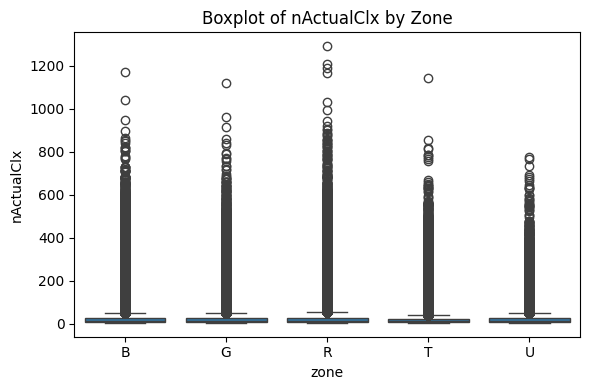

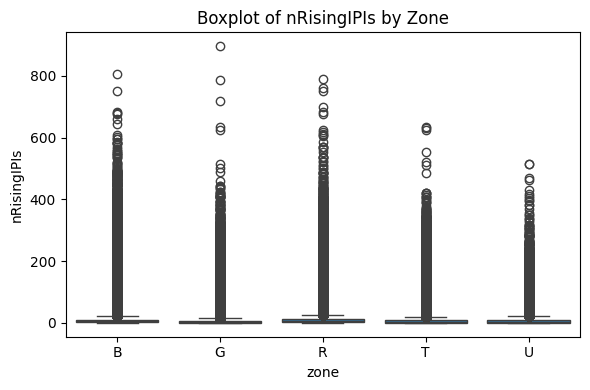

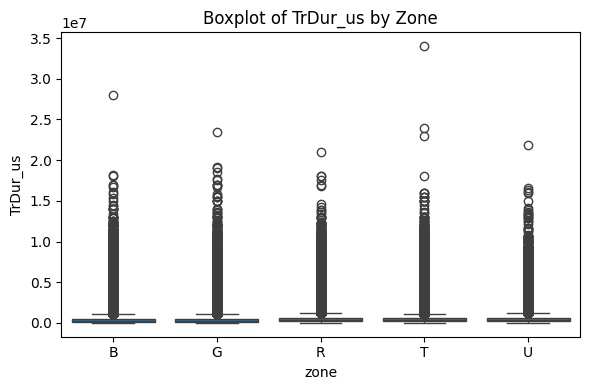

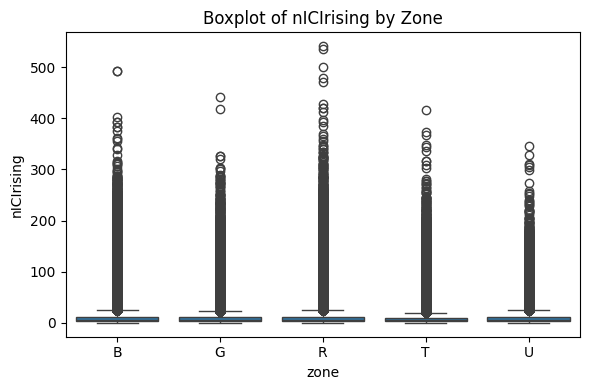

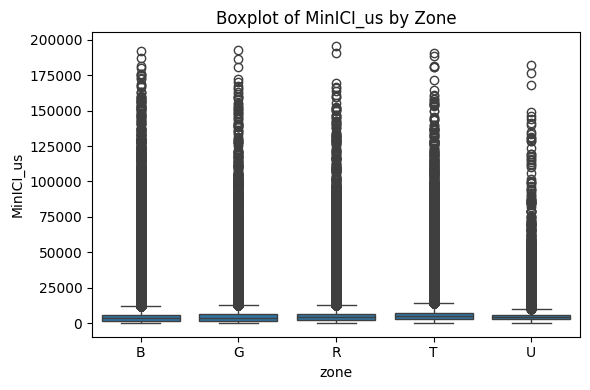

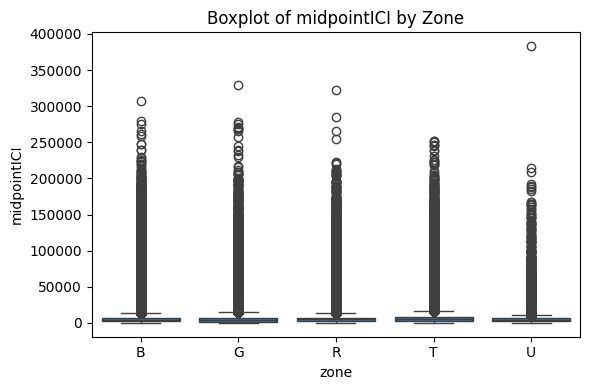

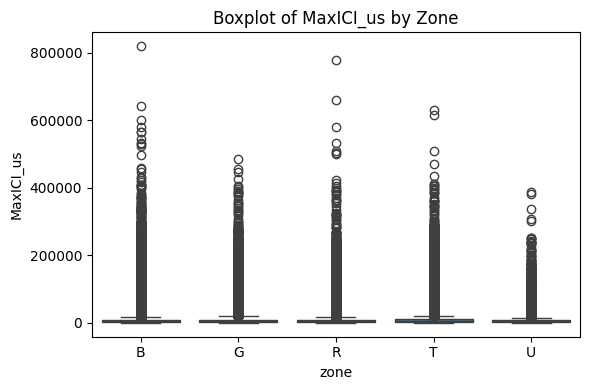

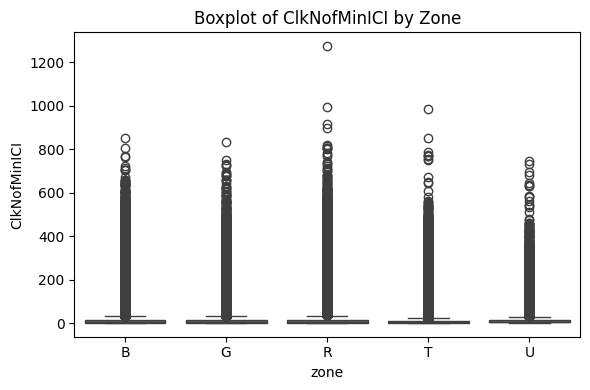

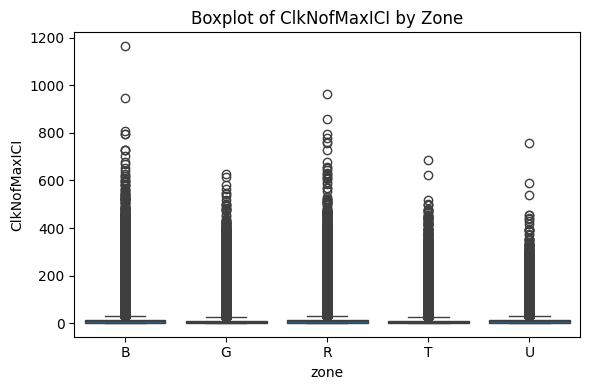

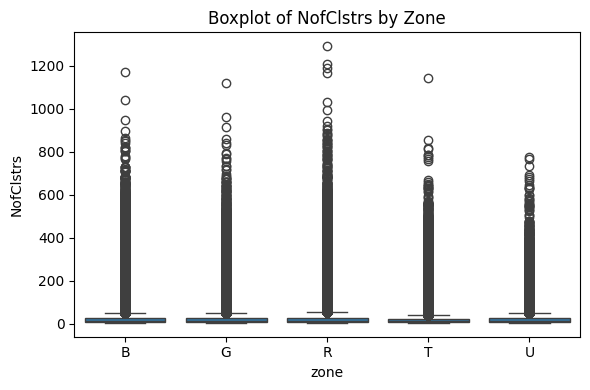

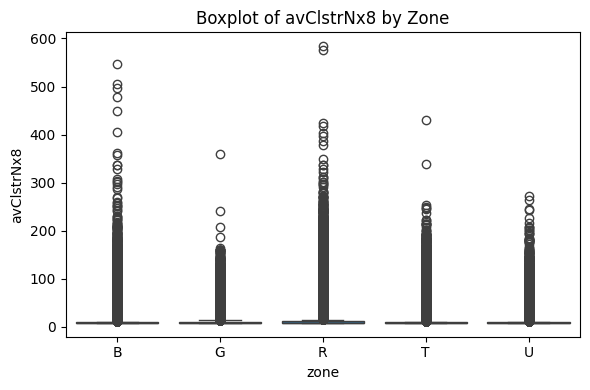

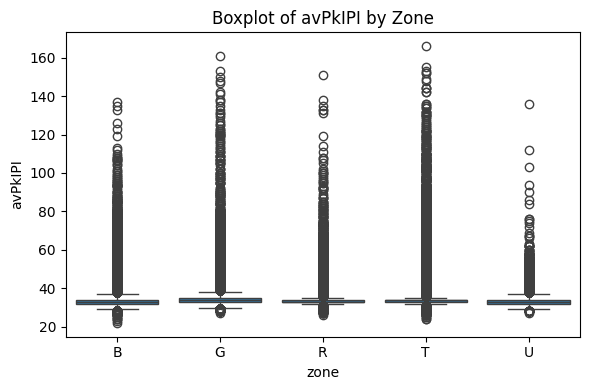

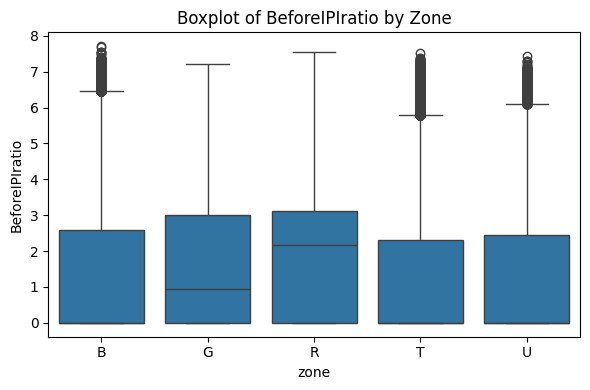

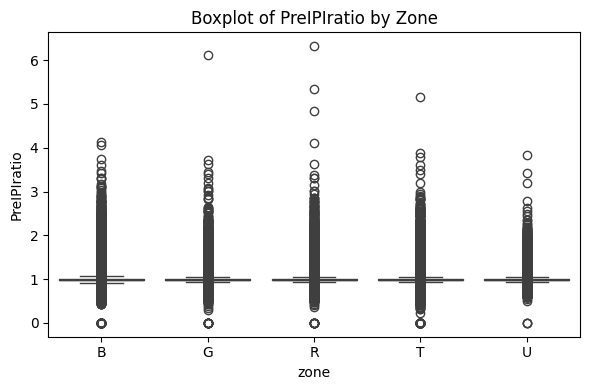

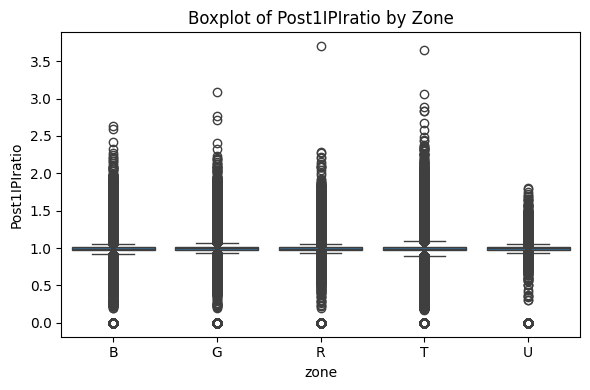

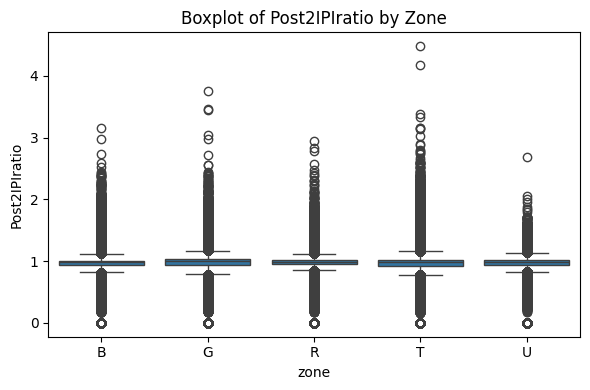

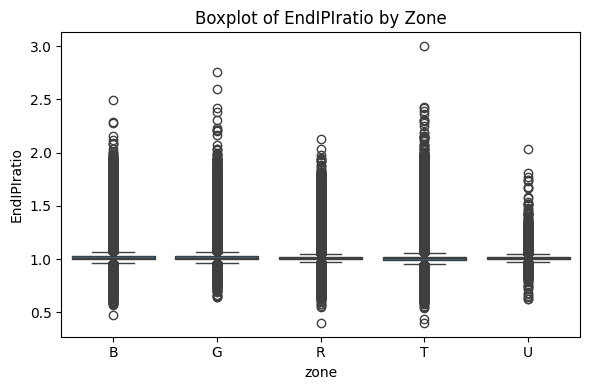

In [41]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# for col in feature_columns:
#     plt.figure(figsize=(6, 4))
#     sns.boxplot(x="zone", y=col, data=unlabeled_df)
#     plt.title(f'Boxplot of {col} by Zone')
#     plt.tight_layout()
#     plt.show()


In [ ]:
!pip install pycaret
from pycaret.classification import setup, compare_models, interpret_model

clf_setup = setup(
    data=df,
    target='label_name', 
    session_id=42,
    silent=True,
    verbose=False,
    preprocess=True,
    feature_selection=True
)
best_model = compare_models()

In [ ]:
from pycaret.classification import plot_model

plot_model(best_model, plot='correlation')  # shows heatmap of correlations


In [ ]:
plot_model(best_model, plot='feature')

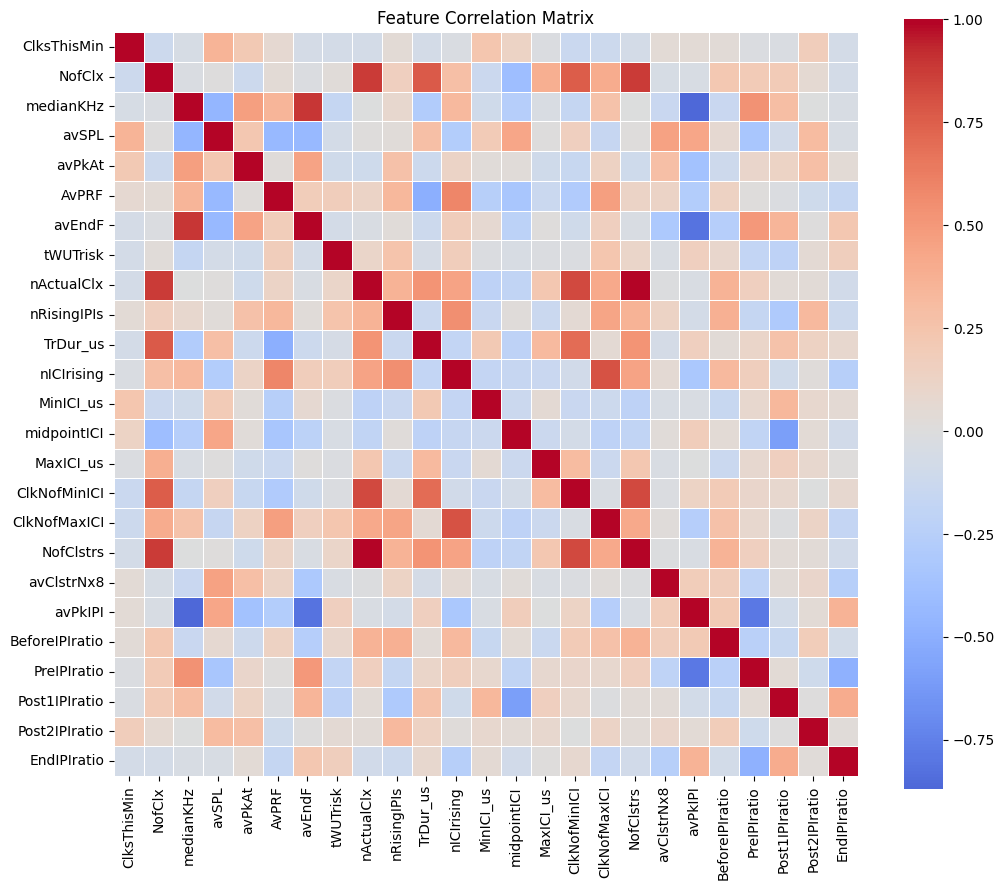

In [42]:
corr = df[feature_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, square=True, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap  # using the umap-learn package

def plot_pca(labeled_x, unlabeled_x=None, labeled_y=None, title="PCA Visualization", figsize=(8, 6), save_path=None):
    """Plots 2D PCA of labeled and unlabeled data, and optionally saves the figure."""
    if unlabeled_x is not None:
        combined_x = np.vstack((labeled_x, unlabeled_x))
    else:
        combined_x = labeled_x

    pca = PCA(n_components=2)
    reduced = pca.fit_transform(combined_x)

    plt.figure(figsize=figsize)
    if unlabeled_x is not None:
        n_labeled = len(labeled_x)
        unlabeled_reduced = reduced[n_labeled:]
        labeled_reduced = reduced[:n_labeled]
        plt.scatter(unlabeled_reduced[:, 0], unlabeled_reduced[:, 1], c='gray', alpha=0.4, label='Unlabeled', s=20)
        if labeled_y is not None:
            for class_id in np.unique(labeled_y):
                idx = labeled_y == class_id
                plt.scatter(labeled_reduced[idx, 0], labeled_reduced[idx, 1], label=f'Class {class_id}', s=30)
        else:
            plt.scatter(labeled_reduced[:, 0], labeled_reduced[:, 1], label='Labeled', s=30)
        
    else:
        if labeled_y is not None:
            for class_id in np.unique(labeled_y):
                idx = labeled_y == class_id
                plt.scatter(reduced[idx, 0], reduced[idx, 1], label=f'Class {class_id}', s=30)
        else:
            plt.scatter(reduced[:, 0], reduced[:, 1], s=30)

    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend()
    plt.grid(True)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', format='pdf')
        print(f"Figure saved as PDF to {save_path}")
    else:
        plt.show()


def plot_tsne(labeled_x, unlabeled_x=None, labeled_y=None, title="t-SNE Visualization", figsize=(8, 6), perplexity=30, random_state=42, save_path=None):
    """Plots 2D t-SNE of labeled and unlabeled data, and optionally saves the figure."""
    if unlabeled_x is not None:
        combined_x = np.vstack((labeled_x, unlabeled_x))
    else:
        combined_x = labeled_x

    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
    reduced = tsne.fit_transform(combined_x)

    plt.figure(figsize=figsize)
    if unlabeled_x is not None:
        n_labeled = len(labeled_x)
        unlabeled_reduced = reduced[n_labeled:]
        labeled_reduced = reduced[:n_labeled]
        plt.scatter(unlabeled_reduced[:, 0], unlabeled_reduced[:, 1], c='gray', alpha=0.4, label='Unlabeled', s=20)
        if labeled_y is not None:
            for class_id in np.unique(labeled_y):
                idx = labeled_y == class_id
                plt.scatter(labeled_reduced[idx, 0], labeled_reduced[idx, 1], label=f'Class {class_id}', s=30)
        else:
            plt.scatter(labeled_reduced[:, 0], labeled_reduced[:, 1], label='Labeled', s=30)
        
    else:
        if labeled_y is not None:
            for class_id in np.unique(labeled_y):
                idx = labeled_y == class_id
                plt.scatter(reduced[idx, 0], reduced[idx, 1], label=f'Class {class_id}', s=30)
        else:
            plt.scatter(reduced[:, 0], reduced[:, 1], s=30)

    plt.title(title)
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.legend()
    plt.grid(True)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', format='pdf')
        print(f"Figure saved as PDF to {save_path}")
    else:
        plt.show()


from sklearn.ensemble import IsolationForest

from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np
import umap

def plot_umap(labeled_x, unlabeled_x=None, labeled_y=None, title="UMAP Visualization", figsize=(8, 6), 
              n_neighbors=15, min_dist=0.1, random_state=42, save_path=None, save_path_outliers=None, 
              perform_outlier_detection=False):
    """Plots and optionally saves UMAP projection and outlier detection with Isolation Forest."""
    
    if unlabeled_x is not None:
        combined_x = np.vstack((labeled_x, unlabeled_x))
    else:
        combined_x = labeled_x

    # Step 1: Compute UMAP projection
    reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist, random_state=random_state)
    reduced = reducer.fit_transform(combined_x)

    # Step 2: Plot normal UMAP
    plt.figure(figsize=figsize)
    if unlabeled_x is not None:
        n_labeled = len(labeled_x)
        unlabeled_reduced = reduced[n_labeled:]
        labeled_reduced = reduced[:n_labeled]
        plt.scatter(unlabeled_reduced[:, 0], unlabeled_reduced[:, 1], c='gray', alpha=0.4, label='Unlabeled', s=20)
        if labeled_y is not None:
            for class_id in np.unique(labeled_y):
                idx = labeled_y == class_id
                plt.scatter(labeled_reduced[idx, 0], labeled_reduced[idx, 1], label=f'Class {class_id}', s=30)
        else:
            plt.scatter(labeled_reduced[:, 0], labeled_reduced[:, 1], label='Labeled', s=30)
    else:
        if labeled_y is not None:
            for class_id in np.unique(labeled_y):
                idx = labeled_y == class_id
                plt.scatter(reduced[idx, 0], reduced[idx, 1], label=f'Class {class_id}', s=30)
        else:
            plt.scatter(reduced[:, 0], reduced[:, 1], s=30)

    plt.title(title)
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.legend()
    plt.grid(True)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', format='pdf')
        print(f"UMAP plot saved to {save_path}")
    else:
        plt.show()

    # Step 3: Outlier detection (if requested)
    if perform_outlier_detection and save_path_outliers:
        iso = IsolationForest(contamination=0.05, random_state=random_state)
        outliers = iso.fit_predict(combined_x)
        is_outlier = (outliers == -1)

        plt.figure(figsize=figsize)
        plt.scatter(reduced[~is_outlier, 0], reduced[~is_outlier, 1], c='blue', label='Inlier', s=5, alpha=0.6)
        plt.scatter(reduced[is_outlier, 0], reduced[is_outlier, 1], c='red', label='Outlier', s=10)
        plt.title("UMAP with Outlier Detection (Isolation Forest)")
        plt.xlabel("UMAP 1")
        plt.ylabel("UMAP 2")
        plt.legend()
        plt.grid(True)

        plt.savefig(save_path_outliers, bbox_inches='tight', format='pdf')
        print(f"UMAP with outliers plot saved to {save_path_outliers}")


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


UMAP plot saved to umap_plot.pdf
UMAP with outliers plot saved to umap_plot_outliers.pdf


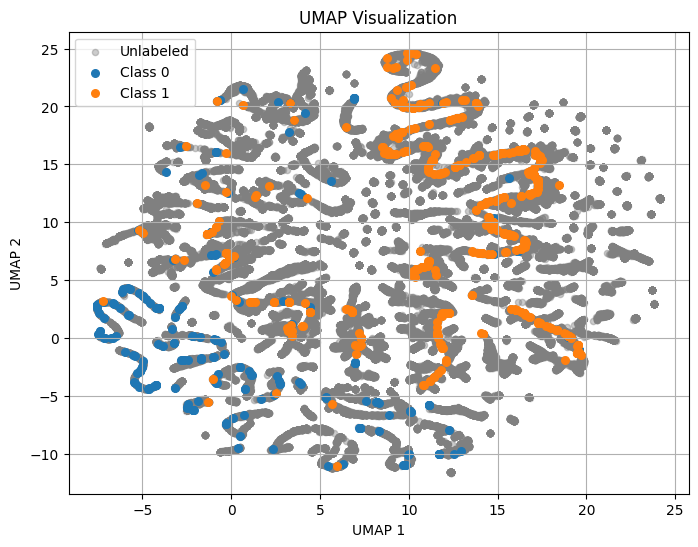

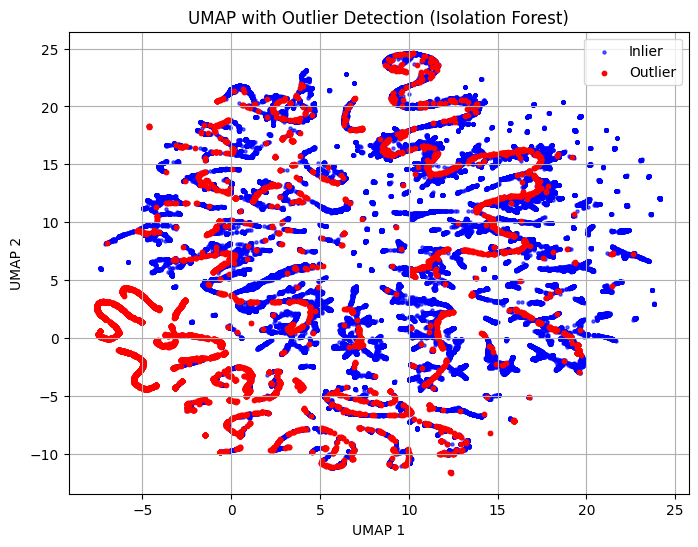

In [52]:
labeled_y = np.concatenate([labeled_y, test_y])
labeled_x = np.concatenate([labeled_x, test_x])
labeled_meta = np.concatenate([labeled_meta, test_meta])
# plot_pca(labeled_x, unlabeled_x[:100000], labeled_y, title="PCA Visualization", save_path="pca_plot.pdf")
# plot_tsne(labeled_x, unlabeled_x[:100000], labeled_y, title="t-SNE Visualization", save_path="tsne_plot.pdf")
plot_umap(labeled_x, unlabeled_x[:100000], labeled_y, title="UMAP Visualization", save_path_outliers="data_files/umap_plot_outliers.pdf", save_path="data_files/umap_plot.pdf", perform_outlier_detection=True)
